In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd



pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 600)

In [2]:
deaths1 = gpd.read_file("../migrant_deaths_analysis/death_files/ogis_migrant_deaths_091021_with_yuma.geojson")



print(len(deaths1))



deaths1['Reporting Date']= pd.to_datetime(deaths1['Reporting Date'])


deaths1['month1']= pd.to_datetime(deaths1['Reporting Date']).dt.month
deaths1['Reporting_year1']= pd.to_datetime(deaths1['Reporting Date']).dt.year

deaths1.to_csv('../migrant_deaths/deaths/ogis_migrant_deaths_091021_with_yuma.csv')


print(len(deaths1[deaths1['Reporting_year1']>= 2021]))
deaths1[deaths1['Reporting_year1']>= 2021].to_csv('../migrant_deaths/deaths/ogis_migrant_deaths_091021_with_yuma2021.csv')

deaths = pd.read_csv("../migrant_deaths/data_for_each_death/death_datapoints_merged.csv")
deaths['Latitude']= deaths.Latitude.astype(float)
deaths['Longitude']= deaths.Longitude.astype(float)
deaths = gpd.GeoDataFrame(deaths, geometry=gpd.points_from_xy(deaths.Longitude,deaths.Latitude))
deaths = deaths.set_crs('epsg:4326')





corridors = gpd.read_file('../migrant_deaths/data_for_each_death/corridors_count_deaths_total.geojson',driver='GeoJSON')

corridors = corridors[['CORNO','geometry']]





# deaths3 = gpd.sjoin(deaths, corridors, how="left", op='intersects')

print(len(deaths1[(deaths1['month1']==6)&(deaths1['Reporting_year1']==2021)]))



deaths1[(deaths1['month1']==6)&(deaths1['Reporting_year1']==2021)]

# print(len(deaths))
# deaths['mountains'].value_counts(dropna=False)

# print((1112+509+46+12)/((1112+509+46+12)+2229))
# print(((1112+509+46+12)+2229))


deaths1.groupby(['Reporting_year1','month1']).size().to_frame().reset_index()

deaths1.groupby(['Reporting_year1']).size().to_frame().reset_index().to_csv('deaths_by_year.csv')

deaths1[deaths1['month1']<=9].groupby(['Reporting_year1']).size().to_frame().reset_index().to_csv('deaths_by_year-Juan-Sept.csv')

deaths1[deaths1['Post Mortem Interval']=='< 1 day'].groupby(['Reporting_year1']).size().to_frame().reset_index().to_csv('deaths_by_year-one_day.csv')



3914
222
52


In [3]:


#  The remains of 222 migrants were found in Southern Arizona from January through September, 
# compared to 192 during the same period last year and 124 during that period in 2019. 
# 
# 
# print(deaths1.groupby(['Reporting_year1']).size().to_frame().reset_index()[0].sum())
# deaths1.groupby(['Reporting_year1']).size().to_frame().reset_index()

deaths1[deaths1['Post Mortem Interval']=='< 1 day']

ML Number                           Name     Sex Age Reporting Date  \
1     00-00148                 Nicolas, Tomas    male  17     2000-01-22   
4     00-00245  Candia-Bravo, Maria Del Rocio  female  20     2000-02-05   
5     00-00246      Enriquez-Hipolito, Natali  female  14     2000-02-05   
6     00-00247                 Castillo, Emma  female  40     2000-02-05   
7     00-00248          Morales-Avenado, Luis    male  41     2000-02-05   
...        ...                            ...     ...  ..            ...   
3431   21-3478                   Unidentified    male         2021-09-07   
3438   21-3527                   Unidentified  female         2021-09-11   
3439   21-3540                   Unidentified  female         2021-09-13   
3442   21-3569                   Unidentified    male         2021-09-15   
3443   21-3578                   Unidentified    male         2021-09-15   

                       Surface Management Location  \
1                        State of Arizona            
4                    Tohono Oodham Nation            
5                    Tohono Oodham Nation            
6                    Tohono Oodham Nation            
7                    Tohono Oodham Nation            
...                                   ...      ...   
3431                 Tohono Oodham Nation            
3438                 Tohono Oodham Nation            
3439                 Tohono Oodham Nation            
3442                 Tohono Oodham Nation            
3443  Organ Pipe Cactus National Monument            

                                     Location Precision Corridor Code  \
1     physical description with directions, distance...             4   
4     physical description with directions, distance...             7   
5     physical description with directions, distance...             7   
6     physical description with directions, distance...             7   
7     physical description with directions, distance...             7   
...                                                 ...           ...   
3431  GPS Coordinate (precise to within ca. 300ft./1...             7   
3438  GPS Coordinate (precise to within ca. 300ft./1...             7   
3439  GPS Coordinate (precise to within ca. 300ft./1...             7   
3442  GPS Coordinate (precise to within ca. 300ft./1...             8   
3443  GPS Coordinate (precise to within ca. 300ft./1...             9   

        Corridor      Cause of Death             OME Determined COD  \
1      Patagonia            Exposure                    HYPOTHERMIA   
4     San Miguel  Blunt Force Injury  MULTIPLE BLUNT FORCE INJURIES   
5     San Miguel  Blunt Force Injury  MULTIPLE BLUNT FORCE INJURIES   
6     San Miguel  Blunt Force Injury  MULTIPLE BLUNT FORCE INJURIES   
7     San Miguel  Blunt Force Injury  MULTIPLE BLUNT FORCE INJURIES   
...          ...                 ...                            ...   
3431  San Miguel            Exposure          Probable hyperthermia   
3438  San Miguel            Exposure          probable hyperthermia   
3439  San Miguel            Exposure          probable hyperthermia   
3442     Cowlick            Exposure          Probable hyperthermia   
3443         Ajo            Exposure          Probable hyperthermia   

     Condition Code Body Condition Post Mortem Interval    State County  \
1                 1  Fully fleshed              < 1 day  Arizona   PIMA   
4                 1  Fully fleshed              < 1 day  Arizona   PIMA   
5                 1  Fully fleshed              < 1 day  Arizona   PIMA   
6                 1  Fully fleshed              < 1 day  Arizona   PIMA   
7                 1  Fully fleshed              < 1 day  Arizona   PIMA   
...             ...            ...                  ...      ...    ...   
3431              1  Fully fleshed              < 1 day  Arizona   PIMA   
3438              1  Fully fleshed              < 1 day  Arizona   PIMA   
3439              1  Fully fleshed    

In [4]:






deaths1['Year']=deaths1['Reporting Date'].dt.to_period('A-OCT')


deaths_year1 = deaths1.groupby('Year').size().to_frame()


In [5]:


deaths1.groupby(['Reporting_year1']).size().to_frame().reset_index()
print(len(deaths1[(deaths1['Post Mortem Interval']=='< 1 day')|(deaths1['Post Mortem Interval']=='< 1 week')]))
print(len(deaths1[(deaths1['Post Mortem Interval']=='< 1 week')]))





deaths1['Post Mortem Interval'].value_counts(dropna=False).to_frame()

1037
0


Post Mortem Interval
< 1 day                        1037
> 6-8 months                    783
< 1 week                        398
< 6-8 months                    351
< 5 weeks                       332
                                330
< 3 months                      294
< 3 weeks                       254
NaN                             135

In [6]:



# print(len(deaths1[(deaths1['Post Mortem Interval']=='< 1 day')|(deaths2['Post Mortem Interval']=='< 1 week')]))


janAug = [1,2,3,4,5,6,7,8,9]
deaths1[(deaths1['month1'].isin(janAug))].groupby(['Reporting_year1']).size().to_frame().reset_index()



deaths1['Post Mortem Interval'].value_counts(dropna=False)


< 1 day          1037
> 6-8 months      783
< 1 week          398
< 6-8 months      351
< 5 weeks         332
                  330
< 3 months        294
< 3 weeks         254
NaN               135
Name: Post Mortem Interval, dtype: int64

In [7]:
deaths1[(deaths1['month1'].isin(janAug))]['Post Mortem Interval'].value_counts(dropna=False)

< 1 day          947
> 6-8 months     590
< 1 week         371
< 5 weeks        305
                 261
< 6-8 months     256
< 3 weeks        239
< 3 months       207
NaN              115
Name: Post Mortem Interval, dtype: int64

In [8]:
print(1037+398)
print(947+371)

1435
1318


In [9]:
157-239
49-77


28/82
# print(len(deaths2))
deaths1['OME Determined COD'].fillna('unknown_data', inplace = True)

#unknown
mylist_unknown =['unknown_data','UNDETERMINED','SKELETAL']
mylist_unknown = [x.lower() for x in mylist_unknown]

print('unknown:')
deaths_unknown = deaths1[deaths1['OME Determined COD'].str.contains('|'.join(mylist_unknown))]

print(len(deaths_unknown))




unknown:
224


In [10]:
# deaths1['Reporting Date']= pd.to_datetime(deaths1['Reporting Date'])


# deaths1['month']= pd.to_datetime(deaths1['Reporting Date']).dt.month
# deaths1['Reporting_year']= pd.to_datetime(deaths1['Reporting Date']).dt.year
# # 'ML Number'
# deaths1.groupby('Reporting_year')['ML Number'].size()
# # deaths1

deaths['coverage total'].value_counts(dropna=False).to_frame()

deaths1.groupby(['Reporting_year1','month1']).size().to_frame().reset_index()

Reporting_year1  month1   0
0             1981.0    11.0   1
1             1982.0     5.0   1
2             1985.0     5.0   1
3             1985.0     9.0   1
4             1985.0    10.0   1
5             1987.0    12.0   1
6             1990.0     2.0   1
7             1990.0     3.0   1
8             1990.0     5.0   3
9             1990.0     6.0   1
10            1990.0     7.0   2
11            1990.0    10.0   1
12            1991.0     1.0   1
13            1991.0     2.0   1
14            1991.0     3.0   1
15            1991.0     7.0   2
16            1991.0     8.0   1
17            1992.0     2.0   1
18            1992.0     4.0   1
19            1992.0     6.0   2
20            1992.0     7.0   2
21            1992.0     9.0   1
22            1992.0    11.0   2
23            1993.0     1.0   1
24            1993.0     3.0   2
25            1993.0     6.0   1
26            1993.0     7.0   3
27            1993.0     8.0   2
28            1993.0    10.0   3
29            1993.0    11.0   3
30            1993.0    12.0   2
31            1994.0     2.0   1
32            1994.0     6.0   1
33            1994.0     7.0   1
34            1994.0     8.0   1
35            1994.0    10.0   1
36            1995.0     1.0   1
37            1995.0     3.0   1
38            1995.0     5.0   1
39            1995.0     8.0   4
40            1995.0     9.0   2
41            1995.0    10.0   1
42            1995.0    11.0   1
43            1995.0    12.0   1
44            1996.0     2.0   2
45            1996.0     6.0   8
46            1996.0     7.0   1
47            1996.0    10.0   1
48            1996.0    11.0   2
49            1997.0     2.0   1
50            1997.0     3.0   6
51            1997.0     4.0   1
52            1997.0     7.0   2
53            1997.0     8.0   8
54            1997.0     9.0   3
55            1997.0    10.0   1
56            1997.0    11.0   2
57            1997.0    12.0   1
58            1998.0     5.0   1
59            1998.0     6.0   1
60            1998.0     7.0   6
61            1998.0     8.0   2
62            1998.0     9.0   4
63            1998.0    10.0   1
64            1999.0     1.0   2
65            1999.0     2.0   2
66            1999.0     4.0   2
67            1999.0     5.0   1
68            1999.0     6.0   4
69            1999.0     7.0   5
70            1999.0     8.0   2
71            1999.0     9.0   2
72            1999.0    10.0   2
73            1999.0    11.0   3
74            2000.0     1.0   4
75            2000.0     2.0   7
76            2000.0     3.0   6
77            2000.0     4.0   5
78            2000.0     5.0  11
79            2000.0     6.0  15
80            2000.0     7.0   5
81            2000.0     8.0   7
82            2000.0     9.0   7
83            2000.0    10.0   4
84            2000.0    11.0   3
85            2000.0    12.0   1
86            2001.0     1.0   1
87            2001.0     2.0   2
88            2001.0     4.0   2
89            2001.0     5.0  20
90            2001.0     6.0  16
91            2001.0     7.0  16
92            2001.0     8.0   4
93            2001.0     9.0   7
94            2001.0    10.0   1
95            2001.0    11.0   8
96            2001.0    12.0   2
97            2002.0     1.0   3
98            2002.0     2.0   4
99            2002.0     3.0   3
100           2002.0     4.0   7
101           2002.0     5.0  10
102           2002.0     6.0  36
103           2002.0     7.0  24
104           2002.0     8.0  30
105           2002.0     9.0  21
106           2002.0    10.0   8
107           2002.0    11.0   4
108           2002.0    12.0   3
109           2003.0     1.0   6
110           2003.0     2.0  10
111           2003.0     3.0   3
112           2003.0     4.0   7
113           2003.0     5.0  22
114           2003.0     6.0  17
115           2003.0     7.0  39
116           2003.0     8.0  22
117           2003.0     9.0  12
118           2003.0    10.0   8
119           2003.0    11.0  12
120         

In [11]:
deaths1[deaths1['Post Mortem Interval'] == '< 1 day'].groupby(['Reporting_year1','month1']).size().to_frame().reset_index() 

Reporting_year1  month1   0
0             2000.0     1.0   1
1             2000.0     2.0   6
2             2000.0     3.0   4
3             2000.0     4.0   4
4             2000.0     5.0   7
5             2000.0     6.0   7
6             2000.0     7.0   1
7             2000.0     8.0   6
8             2000.0     9.0   4
9             2000.0    10.0   3
10            2000.0    11.0   2
11            2001.0     4.0   1
12            2001.0     5.0  10
13            2001.0     6.0   7
14            2001.0     7.0   8
15            2001.0     8.0   3
16            2001.0     9.0   4
17            2001.0    11.0   2
18            2002.0     1.0   2
19            2002.0     2.0   2
20            2002.0     3.0   3
21            2002.0     4.0   5
22            2002.0     5.0   4
23            2002.0     6.0  10
24            2002.0     7.0  10
25            2002.0     8.0  14
26            2002.0     9.0   7
27            2002.0    10.0   2
28            2002.0    12.0   1
29            2003.0     1.0   2
30            2003.0     2.0   2
31            2003.0     4.0   3
32            2003.0     5.0  10
33            2003.0     6.0   7
34            2003.0     7.0  12
35            2003.0     8.0   8
36            2003.0     9.0   7
37            2003.0    11.0   5
38            2004.0     2.0   6
39            2004.0     3.0  10
40            2004.0     4.0  12
41            2004.0     5.0   8
42            2004.0     6.0  22
43            2004.0     7.0  11
44            2004.0     8.0   8
45            2004.0     9.0  11
46            2004.0    10.0   3
47            2004.0    11.0   1
48            2004.0    12.0   3
49            2005.0     1.0   4
50            2005.0     2.0   6
51            2005.0     3.0   7
52            2005.0     4.0   4
53            2005.0     5.0  10
54            2005.0     6.0   4
55            2005.0     7.0  31
56            2005.0     8.0   2
57            2005.0     9.0   8
58            2005.0    10.0   1
59            2005.0    11.0   3
60            2005.0    12.0   3
61            2006.0     1.0   2
62            2006.0     2.0   2
63            2006.0     3.0  12
64            2006.0     4.0   6
65            2006.0     5.0   9
66            2006.0     6.0  16
67            2006.0     7.0  14
68            2006.0     8.0   3
69            2006.0     9.0   3
70            2006.0    10.0   2
71            2006.0    11.0   1
72            2006.0    12.0   1
73            2007.0     1.0   7
74            2007.0     2.0   6
75            2007.0     3.0   6
76            2007.0     4.0   8
77            2007.0     5.0   9
78            2007.0     6.0  20
79            2007.0     7.0  14
80            2007.0     8.0  11
81            2007.0     9.0   3
82            2007.0    10.0   1
83            2007.0    12.0   1
84            2008.0     2.0   4
85            2008.0     4.0  11
86            2008.0     5.0   4
87            2008.0     6.0  15
88            2008.0     7.0   6
89            2008.0     8.0  10
90            2008.0    10.0   5
91            2008.0    12.0   5
92            2009.0     1.0   1
93            2009.0     2.0   3
94            2009.0     3.0   8
95            2009.0     4.0   6
96            2009.0     5.0   8
97            2009.0     6.0  18
98            2009.0     7.0  17
99            2009.0     8.0  10
100           2009.0     9.0   3
101           2009.0    11.0   4
102           2009.0    12.0   5
103           2010.0     1.0   7
104           2010.0     2.0   7
105           2010.0     3.0   2
106           2010.0     4.0   5
107           2010.0     5.0   9
108           2010.0     6.0  13
109           2010.0     7.0  19
110           2010.0     8.0   3
111           2010.0     9.0   4
112           2010.0    10.0   4
113           2010.0    11.0   3
114           2011.0     1.0   3
115           2011.0     2.0   1
116           2011.0     3.0   3
117           2011.0     4.0   2
118           2011.0     5.0   1
119           2011.0     6.0  11
120         

In [12]:
deaths1[deaths1['Post Mortem Interval'] == '< 1 day'].groupby(['Reporting_year1']).size().to_frame().reset_index() 

Reporting_year1   0
0            2000.0  45
1            2001.0  35
2            2002.0  60
3            2003.0  56
4            2004.0  95
5            2005.0  83
6            2006.0  71
7            2007.0  86
8            2008.0  60
9            2009.0  83
10           2010.0  76
11           2011.0  39
12           2012.0  28
13           2013.0  37
14           2014.0  14
15           2015.0  19
16           2016.0  25
17           2017.0  11
18           2018.0  18
19           2019.0  11
20           2020.0  39
21           2021.0  46

In [13]:
# mean_datapoints

In [14]:
# mean_datapoints[mean_datapoints['CORNO']==7]

In [15]:
deaths


altar_valley = gpd.read_file('../migrant_deaths/altar_valley.geojson',driver='GeoJSON')


deaths_altar = gpd.sjoin(deaths1, altar_valley, how="inner", op='intersects')

print(len(deaths_altar[(deaths_altar['Reporting_year1']>=2020)]))

print(len(deaths_altar[(deaths_altar['Reporting_year1']>=2000)]))

deaths_altar.groupby('Reporting_year1').size().to_frame()


26
340


0
Reporting_year1    
1993.0            1
1995.0            2
1996.0            1
1997.0            1
1998.0            1
1999.0            1
2000.0            9
2001.0            1
2002.0           19
2003.0           11
2004.0           23
2005.0           42
2006.0           21
2007.0           35
2008.0           15
2009.0           21
2010.0           20
2011.0            7
2012.0           12
2013.0           14
2014.0            8
2015.0            7
2016.0           13
2017.0           15
2018.0           13
2019.0            8
2020.0           18
2021.0            8

In [16]:
deaths_altar

ML Number                                    Name           Sex Age  \
10    00-00436                      Dominguez, Alfredo          male  34   
12    00-00438                     Diaz-Gonzalez, Jose          male  18   
24    00-00854             Mendoza-Mendoza, Jose Angel          male  40   
25    00-00873                Sanchez-Murrieta, Hector          male  22   
37    00-00964             Herrera-Guzman, Guillermina        female  26   
48    00-01262                  Garcia-Martinez, Mauro          male  31   
51    00-01281                     Lopez-Sanchez, Raul          male  25   
70    00-01777                            Unidentified          male       
73    00-02068                            Unidentified          male       
122   01-01430              GUTIERREZ-HERNANDEZ, IRENE        female  35   
152   02-00064  LOZANO-DE LA ROSA, MARIA LUISA LETICIA        female  32   
156   02-00304              SALAZAR-ONTIVEROS, CASTULO          male  54   
166   02-00679                            Unidentified          male       
167   02-00729                 GONZALEZ-RAMIREZ, JUANA        female  25   
168   02-00730                   CALOCA-VARGAS, ALONSO          male  27   
193   02-00941                   US TUN, LUIS FERNANDO          male  18   
194   02-00961              ESCORCIA-FRANCO, MARGARITO          male  26   
199   02-00987                    LOPEZ MENDEZ, RAFAEL          male  19   
206   02-01033                   SEGURA OLIVEROS, SAUL          male  21   
214   02-01097          SALINAS-ESPINOZA, BLANCA REYNA        female  23   
216   02-01109                  TORRES SANTIAGO, JESUS          male  20   
217   02-01110            HERNANDEZ-BADILLO, ALEJANDRO          male  16   
235   02-01255                 ROSALES-ZAMUDIO, DAMASO          male  27   
237   02-01309            YIN-CERVANTES, JORGE ANTONIO          male  28   
238   02-01310                     ARTEAGA ALBA, JAIME          male  22   
239   02-01311         SOLIS CASTELLANOS, JUAN GABRIEL          male  20   
240   02-01312                 LOPEZ-ZUNIGA, ADALBERTO          male  37   
280   02-01561            E SILVA, FRANKIE CHRISTOPHER          male  30   
286   02-01698                            Unidentified          male       
322   03-00735                  TORRES-ALCALA, GABRIEL          male  47   
332   03-00882                  VELASQUEZ PEREZ, FIDEL          male  17   
348   03-00968                            Unidentified        female       
353   03-01007                            Unidentified        female       
358   03-01039                     MEJIA PEREZ, SERGIO          male  26   
362   03-01120         VELAZQUEZ-GONZALEZ, KEILA MADAI        female  15   
366   03-01133           RODRIGUES DA SILVA, NIVERCINO          male  39   
388   03-01252              HERNANDEZ JIMENEZ, AGUSTIN          male  23   
392   03-01263                            Unidentified          male       
429   03-01609            ARRIAGA CASTILLO, ROSA MARIA        female  22   
431   03-01736       VELAZQUEZ HERNANDEZ, MIGUEL ANGEL          male  40   
458   04-00159                            Unidentified          male       
459   04-00206                            Unidentified          male       
464   04-00329              MARTINEZ-NAVA, MARIA LUCIA        female  26   
466   04-00370                   AVILA-CORTES, ANTONIO          male  57   
471   04-00430             VAZQUEZ HERNANDEZ, LEOPOLDO          male  19   
478   04-00533            GARCIA VELASCO, DIANA RAQUEL        female  19   
479   04-00534         SABINO GARCIA, MARIA DEL CARMEN        female  30   
495   04-00707               BRAVO DE MARZAN, FIDELINA        female  42   
501   04-00765           PALOMARES-RIOS, MARIA FABIOLA        female  18   
519   04-00935          ARGUETA LEZAMA, CARLOS ALBERTO          male  42   
526   04-00980                  PEREZ SANTIAGO, EMELIA        female  45   
536   04-01022                  HERNANDEZ CRUZ, RAQUE

In [17]:
deaths = deaths.drop('geometry',axis=1)
deaths2 = deaths.merge(deaths1, left_on='merge_id',right_on='ML Number',how='left')

deaths3 = deaths2.drop('Year',axis=1)

deaths3.to_file('ogis_migrant_deaths_091021_with_yuma_merge.geojson',driver='GeoJSON')
print(len(deaths2))

deaths2['coverage total'].value_counts(dropna=False).to_frame()

3912


coverage total
7             973
3             762
2             673
0             514
4             420
5             294
6             225
1              51

In [18]:


print(len(deaths[deaths2['Post Mortem Interval'] == '< 1 day']))

one_day2 = deaths[deaths2['Post Mortem Interval'] == '< 1 day'] 

print(len(one_day2[(one_day2['month'] == 7) |(one_day2['month'] == 6) |(one_day2['month'] == 8)|(one_day2['month'] == 5)|(one_day2['month'] == 9)]))



1037
703


In [19]:
deaths2

Unnamed: 0   merge_id_x  coverage total  road_distance_miles  \
0              0     00-00097               7             1.751221   
1              1     00-00148               4             6.097615   
2              2     00-00189               5             5.696042   
3              3     00-00222               4             0.004280   
4              4     00-00245               2             0.011787   
...          ...          ...             ...                  ...   
3907        3907   2021-1141                0            22.375193   
3908        3908   2021-1182                6                  NaN   
3909        3909   2021-1183                7                  NaN   
3910        3910  2021-73360                7                  NaN   
3911        3911   2021-1186                6                  NaN   

          Date_x  month  mountains  town_distance_miles   max_temp   min_temp  \
0     2000-01-10    1.0        0.0             4.586541  20.664286   5.521410   
1     2000-01-22    1.0        4.0            14.032261  16.373144  11.443297   
2     2000-01-20    1.0        5.0            15.912426  24.196980   8.113583   
3     2000-01-10    1.0        6.0             2.645468  21.976202   5.249127   
4     2000-02-05    2.0        0.0            14.818621  22.456686   5.859336   
...          ...    ...        ...                  ...        ...        ...   
3907  2021-08-31    8.0        0.0            31.439922  32.326923  26.446465   
3908         NaN    NaN        NaN             0.847098        NaN        NaN   
3909         NaN    NaN        NaN             1.293683        NaN        NaN   
3910         NaN    NaN        NaN             0.801219        NaN        NaN   
3911         NaN    NaN        NaN             3.591523        NaN        NaN   

      Reporting_year  border_distance_miles  Longitude_x  Latitude_x  \
0             2000.0               0.010159  -114.799807   32.589668   
1             2000.0              33.027764  -110.483205   31.812406   
2             2000.0              13.603753  -111.151300   31.568000   
3             2000.0              30.697289  -112.826855   32.355997   
4             2000.0              10.355888  -111.779830   31.717790   
...              ...                    ...          ...         ...   
3907          2021.0                    NaN          NaN         NaN   
3908             NaN                    NaN          NaN         NaN   
3909             NaN                    NaN          NaN         NaN   
3910             NaN                    NaN          NaN         NaN   
3911             NaN                    NaN          NaN         NaN   

     ML Number                           Name     Sex  Age Reporting Date  \
0     00-00097                   Unidentified    male          2000-01-10   
1     00-00148                 Nicolas, Tomas    male   17     2000-01-22   
2     00-00189                   Unidentified    male          2000-01-20   
3     00-00222                   Unidentified    male          2000-01-10   
4     00-00245  Candia-Bravo, Maria Del Rocio  female   20     2000-02-05   
...        ...                            ...     ...  ...            ...   
3907       NaN                            NaN     NaN  NaN            NaT   
3908       NaN                            NaN     NaN  NaN            NaT   
3909       NaN                            NaN     NaN  NaN            NaT   
3910       NaN                            NaN     NaN  NaN            NaT   
3911       NaN                            NaN     NaN  NaN            NaT   

              Surface Management Location  \
0     Cocopah Indian Reservation            
1               State of Arizona            
2              US Forest Service            
3                        Private            
4           Tohono Oodham Nation            
...                          ...      ...   
3907                         NaN      NaN   
3908                         NaN      NaN 

In [20]:


deaths1["Age"] = pd.to_numeric(deaths1["Age"],errors='coerce')

# print(len(deaths2[(deaths2['Age']>=18)|(deaths2['Age']<=39)]))


deaths2020 = deaths1[(deaths1['Reporting_year1']>= 2000)]


# print(len(deaths1[(deaths2['Age']<18)]))
print('under 18')
print(len(deaths1[(deaths1['Reporting_year1']>= 2000)&((deaths1['Age']<18))]))
print('18-29')
print(len(deaths2020[(deaths1["Age"]>=18)&(deaths1['Age']<=29)]))
print('30-39')
print(len(deaths2020[(deaths1['Age']>=30)&(deaths1['Age']<=39)]))
print('40-49')
print(len(deaths2020[(deaths1['Age']>=40)&(deaths1['Age']<=49)]))



# print(len(deaths2[(deaths2['Reporting_year']>= 2000)&((deaths2['Age']>=30)|(deaths2['Age']<=39))]))

# print(len(deaths2[(deaths2['Reporting_year']>= 2000)&((deaths2['Age']>=40)|(deaths2['Age']<=49))]))

print('50+')
print(len(deaths1[(deaths2['Reporting_year1']>= 2000)&((deaths1['Age']>=50))]))

deaths2020['Age'].value_counts(dropna=False)

under 18
109
18-29
960
30-39
731
40-49
367
50+
116


/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/geopandas/geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


NaN     1484
30.0     101
24.0      92
26.0      91
25.0      88
23.0      85
29.0      83
35.0      83
28.0      79
27.0      77
22.0      77
31.0      77
32.0      77
20.0      75
19.0      75
21.0      73
38.0      70
34.0      70
33.0      70
36.0      66
37.0      65
18.0      65
40.0      56
39.0      52
42.0      51
45.0      46
41.0      46
43.0      45
46.0      38
17.0      34
44.0      32
16.0      27
53.0      20
15.0      20
47.0      20
50.0      19
48.0      19
49.0      14
55.0      13
51.0      13
14.0      11
57.0       9
52.0       9
58.0       6
54.0       6
13.0       4
60.0       4
61.0       4
56.0       4
10.0       3
0.0        3
64.0       3
12.0       2
11.0       2
63.0       2
67.0       2
66.0       1
3.0        1
62.0       1
2.0        1
59.0       1
99.0       1
65.0       1
6.0        1
Name: Age, dtype: int64

In [21]:
# In June, 31 remains were men, seven were women, and the gender could not be determined with six sets of remains.

print(len(deaths2[(deaths2['Reporting_year']==2021)&(deaths2['month']==6)]))

deaths2['Sex']=deaths2['Sex'].str.lower()

deaths1['Sex'] =deaths1['Sex'].str.lower()

deaths2[deaths2['Reporting_year']>=2000]['Sex'].value_counts(dropna=False).to_frame()




52


Sex
male          3024
female         512
NaN            129
undetermined    96
                 3

In [22]:
print(deaths1[(deaths1['Reporting_year1']==2021)&(deaths1['month1']==6)]['Age'].min())
print(deaths1[(deaths1['Reporting_year1']==2021)&(deaths1['month1']==6)]['Age'].max())
deaths1[(deaths1['Reporting_year1']==2021)&(deaths1['month1']==6)]['Sex'].value_counts(dropna=False).to_frame()

19.0
54.0


Sex
male           35
female          8
undetermined    6
40              1
female          1
unknown         1

In [23]:
deaths1[(deaths1['Reporting_year1']==2021)&(deaths1['month1']==6)]['Age'].value_counts(dropna=False)

NaN     15
28.0     3
42.0     3
40.0     2
35.0     2
23.0     2
37.0     2
29.0     2
36.0     2
31.0     2
45.0     2
27.0     2
20.0     2
32.0     1
34.0     1
24.0     1
22.0     1
47.0     1
19.0     1
39.0     1
44.0     1
54.0     1
26.0     1
51.0     1
Name: Age, dtype: int64

In [24]:
deaths2[(deaths2['Reporting_year']==2021)&(deaths2['month']==6)]

Unnamed: 0 merge_id_x  coverage total  road_distance_miles      Date_x  \
3347        3347    21-2200               7             0.008199  2021-06-01   
3348        3348    21-2222               3             2.204347  2021-06-03   
3349        3349    21-2230               3             0.010000  2021-06-03   
3350        3350    21-2252               3             9.630199  2021-06-05   
3351        3351    21-2259               2             5.080003  2021-06-05   
3352        3352    21-2267               7             4.154067  2021-06-06   
3353        3353    21-2283               7             3.339951  2021-06-07   
3354        3354    21-2293               7             0.862542  2021-06-08   
3355        3355    21-2294               7             0.887569  2021-06-08   
3356        3356    21-2318               0             3.075641  2021-06-11   
3357        3357    21-2332               7             0.730606  2021-06-12   
3358        3358    21-2341               0             2.087183  2021-06-13   
3359        3359    21-2349               3             1.424498  2021-06-13   
3360        3360    21-2356               3             3.892738  2021-06-14   
3361        3361    21-2365               3            12.099866  2021-06-14   
3362        3362    21-2373               5             2.731838  2021-06-15   
3363        3363    21-2375               3             6.407366  2021-06-15   
3364        3364    21-2383               7             0.694099  2021-06-16   
3365        3365    21-2395               2             6.120531  2021-06-17   
3366        3366    21-2396               2             4.628880  2021-06-17   
3367        3367    21-2410               2             2.655646  2021-06-13   
3368        3368    21-2411               4             6.111101  2021-06-18   
3369        3369    21-2437               7             0.977950  2021-06-20   
3370        3370    21-2458               3             8.071396  2021-06-21   
3371        3371    21-2459               2             3.466736  2021-06-21   
3372        3372    21-2460               7             3.141429  2021-06-21   
3373        3373    21-2474               7             1.010338  2021-06-22   
3374        3374    21-2477               7             3.340843  2021-06-22   
3375        3375    21-2478               2             1.575013  2021-06-22   
3376        3376    21-2489               5             5.913162  2021-06-22   
3377        3377    21-2514               4             2.966639  2021-06-24   
3378        3378    21-2526               4             0.796359  2021-06-25   
3379        3379    21-2529               6             0.682005  2021-06-24   
3380        3380    21-2544               3             7.326497  2021-06-26   
3381        3381    21-2562               3             7.359928  2021-06-28   
3382        3382    21-2565               2             4.190744  2021-06-28   
3383        3383    21-2573               2             2.242504  2021-06-28   
3384        3384    21-2579               0            15.182437  2021-06-29   
3385        3385    21-2580               3             4.893360  2021-06-29   
3386        3386    21-2581               5             0.067120  2021-06-29   
3387        3387    21-2587               0             6.381590  2021-06-30   
3388        3388    21-2589               2             2.748949  2021-06-30   
3389        3389    21-2593               7             0.061672  2021-06-30   
3393        3393    21-2669               0            15.182437  2021-06-29   
3886        3886   2021-771               4             8.192870  2021-06-01   
3887        3887   2021-782               7             3.864287  2021-06-01   
3888        3888   2021-817               7             5.048202  2021-06-13   
3889        3889   2021-853               3             2.371684  2021-06-22   
3890        3890   2021-857               0            14.597452  2021-06-23   
3891  

In [25]:
print(len(deaths1[(deaths1['Post Mortem Interval']=='< 1 day')|(deaths2['Post Mortem Interval']=='< 1 week')]))





1037


In [26]:



deaths2[(deaths2['month']<=9)].groupby('Reporting_year').size()

Reporting_year
1982.0      1
1985.0      2
1990.0      8
1991.0      6
1992.0      7
1993.0      9
1994.0      4
1995.0      9
1996.0     11
1997.0     21
1998.0     14
1999.0     20
2000.0     67
2001.0     68
2002.0    138
2003.0    138
2004.0    163
2005.0    179
2006.0    176
2007.0    202
2008.0    136
2009.0    159
2010.0    186
2011.0    140
2012.0    136
2013.0    172
2014.0    115
2015.0    124
2016.0    128
2017.0    106
2018.0    107
2019.0    124
2020.0    192
2021.0    217
dtype: int64

In [27]:
#fact check june is more than all of 20XX and 20XX




In [28]:
corridors = gpd.read_file('../migrant_deaths/data_for_each_death/corridors_count_deaths_total.geojson',driver='GeoJSON')

corridors = corridors[['CORNO','geometry']]





deaths3 = gpd.sjoin(deaths2, corridors, how="left", op='intersects')

deaths3['Reporting Date']= pd.to_datetime(deaths3['Reporting Date'])


deaths3['month']= pd.to_datetime(deaths3['Reporting Date']).dt.month
deaths3['Reporting_year']= pd.to_datetime(deaths3['Reporting Date']).dt.year
print(deaths3['Reporting_year'].max())
print(deaths3['Reporting_year'].min())
print(len(deaths3[(deaths3['CORNO'] == 7)&(deaths3['Reporting_year']>= 2000)]))

2021.0
1981.0
1369


In [29]:
deaths3[deaths3['Reporting_year']== 2021]['CORNO'].value_counts(dropna=False).to_frame()
deaths_by_cor_2021 = deaths3[deaths3['Reporting_year']== 2021]['CORNO'].value_counts(dropna=False).to_frame().reset_index()


deaths_by_cor_2021 = corridors.merge(deaths_by_cor_2021,left_on='CORNO',right_on='index',how='left')
# deaths_by_cor_2021

deaths_by_cor_2021 = gpd.GeoDataFrame(deaths_by_cor_2021, crs="EPSG:4326")





deaths_by_cor_2021 = deaths_by_cor_2021.to_crs('epsg:26912')

deaths_by_cor_2021['area'] = deaths_by_cor_2021['geometry'].area/ 10**6
deaths_by_cor_2021 =deaths_by_cor_2021.to_crs('epsg:4326')

deaths_by_cor_2021['rate'] = (deaths_by_cor_2021['CORNO_y']/deaths_by_cor_2021['area'])*1000


deaths_by_cor_2021



CORNO_x                                           geometry  index  \
0         1  MULTIPOLYGON (((-109.04793 32.33098, -109.0478...    1.0   
1         2  MULTIPOLYGON (((-109.76963 32.47647, -109.7686...    2.0   
2         3  MULTIPOLYGON (((-110.00411 31.96544, -110.0041...    3.0   
3         4  MULTIPOLYGON (((-110.41332 31.86893, -110.4133...    4.0   
4         6  MULTIPOLYGON (((-110.90377 32.35741, -110.9047...    6.0   
5         7  MULTIPOLYGON (((-111.55929 32.86606, -111.5592...    7.0   
6         8  MULTIPOLYGON (((-112.10116 32.96800, -112.1011...    8.0   
7         9  MULTIPOLYGON (((-112.39732 32.75560, -112.3973...    9.0   
8        10  MULTIPOLYGON (((-113.00109 32.69222, -113.0010...   10.0   
9        11  MULTIPOLYGON (((-113.73635 32.82034, -113.7363...   11.0   
10       12  MULTIPOLYGON (((-114.04900 32.26379, -114.0489...    NaN   
11        5  MULTIPOLYGON (((-110.98702 32.10656, -110.9860...    5.0   

    CORNO_y         area      rate  
0       5.0  5987.041969  0.835137  
1       6.0  6142.787098  0.976755  
2       5.0  3386.289151  1.476543  
3       1.0  3884.398717  0.257440  
4      12.0  6428.559110  1.866670  
5      78.0  9335.682451  8.355040  
6      14.0  4527.643763  3.092116  
7      10.0  4851.435830  2.061245  
8      27.0  3725.378364  7.247586  
9       7.0  7457.059332  0.938708  
10      NaN  1973.604097       NaN  
11     23.0  3448.886860  6.668818

In [30]:
# print(deaths_by_cor_2021)







coverage total
7             973
3             762
2             673
0             514
4             420
5             294
6             225
1              51

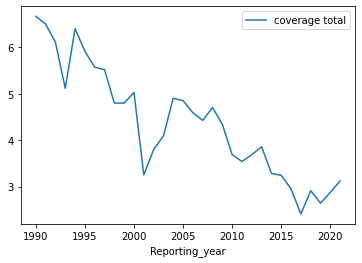

In [31]:
#cell coverage 

avg_cell_year = deaths2[deaths2['Reporting_year']>= 1990].groupby('Reporting_year')['coverage total'].mean().to_frame().reset_index()
avg_cell_year.plot(kind='line',x='Reporting_year')



deaths3['coverage total'].value_counts(dropna=False).to_frame()

In [32]:
print('run this one')
deaths2[(deaths2['Reporting_year']>= 2021)&(deaths2['month']==6)]['coverage total'].value_counts(dropna=False).to_frame()



run this one


coverage total
7              14
3              12
2              10
0               8
4               4
5               3
6               1

In [33]:
# deaths3[(deaths3['Reporting_year']>= 2021)&(deaths3['month']==6)].to_file('june_test.geojson',driver='GeoJSON')


# df.isna()

# deaths3[(deaths3['Reporting_year']>= 2021)&(deaths3['month']==6)&(deaths3['coverage total'].isna())]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


CORNO       1.0       2.0       3.0       4.0       5.0       6.0       7.0  \
0      0.000000  0.000000  0.000000  0.355556  0.111111  0.177778  0.200000   
1      0.000000  0.000000  0.000000  0.117647  0.058824  0.029412  0.411765   
2      0.016949  0.000000  0.000000  0.084746  0.033898  0.186441  0.576271   
3      0.000000  0.019231  0.019231  0.230769  0.038462  0.057692  0.442308   
4      0.000000  0.010870  0.000000  0.228261  0.141304  0.141304  0.293478   
5      0.000000  0.024096  0.012048  0.108434  0.096386  0.289157  0.325301   
6      0.000000  0.000000  0.000000  0.114286  0.171429  0.242857  0.357143   
7      0.000000  0.012048  0.000000  0.096386  0.192771  0.192771  0.433735   
8      0.000000  0.000000  0.022727  0.090909  0.113636  0.159091  0.522727   
9      0.000000  0.000000  0.000000  0.180723  0.228916  0.120482  0.361446   
10     0.000000  0.000000  0.000000  0.013158  0.184211  0.184211  0.447368   
11     0.000000  0.000000  0.000000  0.026316  0.210526  0.078947  0.394737   
12     0.000000  0.000000  0.000000  0.178571  0.071429  0.071429  0.571429   
13     0.027027  0.000000  0.027027  0.162162  0.189189  0.216216  0.297297   
14     0.153846  0.076923  0.076923  0.153846  0.076923  0.153846  0.076923   
15     0.052632  0.000000  0.000000  0.157895  0.105263  0.052632  0.368421   
16     0.000000  0.041667  0.000000  0.041667  0.166667  0.125000  0.416667   
17     0.000000  0.000000  0.000000  0.000000  0.000000  0.454545  0.272727   
18     0.000000  0.058824  0.117647  0.000000  0.000000  0.058824  0.411765   
19     0.000000  0.000000  0.000000  0.090909  0.181818  0.181818  0.454545   
20     0.076923  0.025641  0.076923  0.025641  0.230769  0.179487  0.282051   
21     0.043478  0.065217  0.086957  0.021739  0.260870  0.130435  0.347826   

CORNO       8.0       9.0      10.0      11.0      12.0  
0      0.133333  0.022222  0.000000  0.000000  0.000000  
1      0.058824  0.147059  0.000000  0.176471  0.000000  
2      0.067797  0.016949  0.016949  0.000000  0.000000  
3      0.115385  0.076923  0.000000  0.000000  0.000000  
4      0.108696  0.043478  0.021739  0.000000  0.010870  
5      0.084337  0.036145  0.000000  0.012048  0.012048  
6      0.071429  0.042857  0.000000  0.000000  0.000000  
7      0.036145  0.024096  0.000000  0.000000  0.012048  
8      0.068182  0.022727  0.000000  0.000000  0.000000  
9      0.060241  0.012048  0.036145  0.000000  0.000000  
10     0.118421  0.039474  0.013158  0.000000  0.000000  
11     0.184211  0.052632  0.052632  0.000000  0.000000  
12     0.071429  0.000000  0.035714  0.000000  0.000000  
13     0.054054  0.000000  0.027027  0.000000  0.000000  
14     0.076923  0.000000  0.153846  0.000000  0.000000  
15     0.052632  0.105263  0.105263  0.000000  0.000000  
16     0.000000  0.000000  0.125000  0.041667  0.041667  
17     0.000000  0.181818  0.090909  0.000000  0.000000  
18     0.000000  0.176471  0.176471  0.000000  0.000000  
19     0.000000  0.000000  0.090909  0.000000  0.000000  
20     0.025641  0.051282  0.025641  0.000000  0.000000  
21     0.021739  0.021739  0.000000  0.000000  0.000000

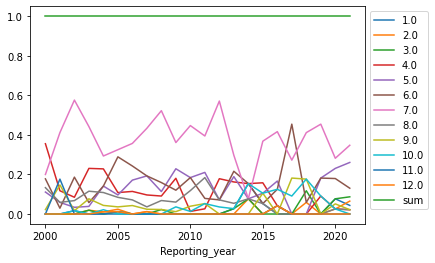

In [34]:
# one-days shifting




oneday_corno = deaths3[deaths3['Post Mortem Interval'] == '< 1 day'].groupby(['Reporting_year','CORNO']).size().to_frame()

oneday_corno.columns = ['count']

oneday_corno = oneday_corno.reset_index()


oneday_corno_piv = oneday_corno.pivot(index='Reporting_year', columns='CORNO', values='count').fillna(0)

# oneday_corno_piv.plot(kind='line',x='Reporting_year')

column_list=[*range(1, 13, 1)]
print(column_list)


oneday_corno_piv
# https://stackoverflow.com/questions/50820659/compute-row-percentages-in-pandas-dataframe
res = oneday_corno_piv.div(oneday_corno_piv.sum(axis=1), axis=0)

res

res["sum"] = res[column_list].sum(axis=1)
# oneday_corno_piv.apply(lambda x: print(x),axis=1)
res= res.reset_index()
# oneday_corno_piv
ax=res.plot.line(x='Reporting_year')

ax.legend(bbox_to_anchor=(1.0, 1.0))
res

res[column_list]


# Migrants who die only hours before help arrives are commonly found in the corridor west of the Baboquivari Mountains. The largest share of these deaths have been found in this corridor nearly every year since 2000.


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


CORNO  Reporting_year       1.0       2.0       3.0       4.0       5.0  \
0              1990.0  0.000000  0.000000  0.000000  0.375000  0.125000   
1              1991.0  0.000000  0.000000  0.000000  0.500000  0.000000   
2              1992.0  0.000000  0.000000  0.000000  0.285714  0.000000   
3              1993.0  0.000000  0.058824  0.000000  0.117647  0.235294   
4              1994.0  0.000000  0.000000  0.000000  0.000000  0.333333   
5              1995.0  0.000000  0.000000  0.000000  0.300000  0.100000   
6              1996.0  0.000000  0.000000  0.000000  0.083333  0.083333   
7              1997.0  0.000000  0.000000  0.000000  0.272727  0.227273   
8              1998.0  0.000000  0.066667  0.000000  0.133333  0.066667   
9              1999.0  0.000000  0.000000  0.000000  0.045455  0.181818   
10             2000.0  0.000000  0.000000  0.000000  0.256757  0.121622   
11             2001.0  0.000000  0.000000  0.000000  0.051282  0.051282   
12             2002.0  0.006711  0.000000  0.000000  0.033557  0.026846   
13             2003.0  0.000000  0.006410  0.006410  0.096154  0.051282   
14             2004.0  0.000000  0.005556  0.000000  0.138889  0.155556   
15             2005.0  0.000000  0.010050  0.010050  0.070352  0.130653   
16             2006.0  0.000000  0.000000  0.000000  0.071856  0.137725   
17             2007.0  0.000000  0.004673  0.000000  0.060748  0.168224   
18             2008.0  0.000000  0.000000  0.006897  0.034483  0.206897   
19             2009.0  0.000000  0.000000  0.000000  0.082474  0.206186   
20             2010.0  0.000000  0.000000  0.000000  0.026906  0.116592   
21             2011.0  0.000000  0.000000  0.000000  0.011364  0.136364   
22             2012.0  0.006329  0.000000  0.018987  0.056962  0.082278   
23             2013.0  0.011494  0.011494  0.017241  0.034483  0.120690   
24             2014.0  0.015152  0.015152  0.022727  0.022727  0.068182   
25             2015.0  0.020833  0.006944  0.006944  0.034722  0.090278   
26             2016.0  0.006289  0.006289  0.012579  0.025157  0.031447   
27             2017.0  0.000000  0.000000  0.016529  0.008264  0.000000   
28             2018.0  0.000000  0.016260  0.032520  0.008130  0.056911   
29             2019.0  0.007092  0.007092  0.042553  0.007092  0.021277   
30             2020.0  0.027273  0.031818  0.027273  0.009091  0.072727   
31             2021.0  0.026596  0.031915  0.026596  0.005319  0.122340   

CORNO       6.0       7.0       8.0       9.0      10.0      11.0      12.0  \
0      0.125000  0.250000  0.000000  0.000000  0.000000  0.125000  0.000000   
1      0.000000  0.500000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.571429  0.142857  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.117647  0.411765  0.058824  0.000000  0.000000  0.000000  0.000000   
4      0.666667  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5      0.300000  0.200000  0.000000  0.100000  0.000000  0.000000  0.000000   
6      0.500000  0.250000  0.000000  0.083333  0.000000  0.000000  0.000000   
7      0.045455  0.000000  0.090909  0.272727  0.045455  0.045455  0.000000   
8      0.066667  0.466667  0.000000  0.133333  0.000000  0.000000  0.066667   
9      0.090909  0.318182  0.045455  0.227273  0.045455  0.000000  0.045455   
10     0.189189  0.229730  0.108108  0.067568  0.013514  0.000000  0.013514   
11     0.038462  0.371795  0.064103  0.230769  0.012821  0.179487  0.000000   
12     0.154362  0.577181  0.060403  0.107383  0.033557  0.000000  0.000000   
13     0.096154  0.487179  0.070513  0.108974  0.064103  0.006410  0.006410   
14     0.177778  0.277778  0.083333  0.100000  0.050000  0.000000  0.011111   
15     0.321608  0.306533  0.045226  0.060302  0.015075  0.010050  0.020101   
16     0.215569  0.413174  0.053892  0.077844  0.029940  0.000000  0.000000   
17     0.219626  0.415888  0.046729  0.051402  0.028037  0.000000  0.004673   
18     0.227586  0.4137

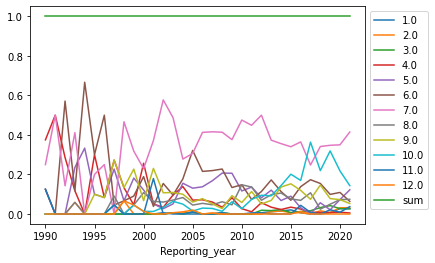

In [35]:
# toatal deaths shifting



oneday_corno = deaths3[deaths3['Reporting_year']>= 1990].groupby(['Reporting_year','CORNO']).size().to_frame()

oneday_corno.columns = ['count']

oneday_corno = oneday_corno.reset_index()


oneday_corno_piv = oneday_corno.pivot(index='Reporting_year', columns='CORNO', values='count').fillna(0)

# oneday_corno_piv.plot(kind='line',x='Reporting_year')

column_list=[*range(1, 13, 1)]
print(column_list)


oneday_corno_piv
# https://stackoverflow.com/questions/50820659/compute-row-percentages-in-pandas-dataframe
res = oneday_corno_piv.div(oneday_corno_piv.sum(axis=1), axis=0)

res

res["sum"] = res[column_list].sum(axis=1)
# oneday_corno_piv.apply(lambda x: print(x),axis=1)
res= res.reset_index()
# oneday_corno_piv
ax=res.plot.line(x='Reporting_year')

ax.legend(bbox_to_anchor=(1.0, 1.0))
res

res


In [36]:
# 2021 deaths by corridors


deaths2021 = deaths3[deaths3['Reporting_year']==2021]

def funx(x):
    
    return np.sum(deaths2021.intersects(x['geometry']))

corridors['sum_intersects1']= corridors.apply(lambda x:funx(x),axis=1)

print(corridors['sum_intersects1'].sum())
corridors.to_file('CORRECT_2021_deaths_by_corridor.geojson',driver='GeoJSON')
corridors

188


CORNO                                           geometry  sum_intersects1
0       1  MULTIPOLYGON (((-109.04793 32.33098, -109.0478...                5
1       2  MULTIPOLYGON (((-109.76963 32.47647, -109.7686...                6
2       3  MULTIPOLYGON (((-110.00411 31.96544, -110.0041...                5
3       4  MULTIPOLYGON (((-110.41332 31.86893, -110.4133...                1
4       6  MULTIPOLYGON (((-110.90377 32.35741, -110.9047...               12
5       7  MULTIPOLYGON (((-111.55929 32.86606, -111.5592...               78
6       8  MULTIPOLYGON (((-112.10116 32.96800, -112.1011...               14
7       9  MULTIPOLYGON (((-112.39732 32.75560, -112.3973...               10
8      10  MULTIPOLYGON (((-113.00109 32.69222, -113.0010...               27
9      11  MULTIPOLYGON (((-113.73635 32.82034, -113.7363...                7
10     12  MULTIPOLYGON (((-114.04900 32.26379, -114.0489...                0
11      5  MULTIPOLYGON (((-110.98702 32.10656, -110.9860...               23

In [37]:
deaths3['Age']  = pd.to_numeric(deaths3['Age'],errors='coerce')

deaths3['Age'].value_counts(dropna=False)

NaN     1699
30.0      98
24.0      88
25.0      87
26.0      85
23.0      84
29.0      81
35.0      80
27.0      76
20.0      75
31.0      75
32.0      75
22.0      74
19.0      74
28.0      72
21.0      71
38.0      69
34.0      69
33.0      67
18.0      64
37.0      63
36.0      62
40.0      55
39.0      51
42.0      49
45.0      44
41.0      43
43.0      43
46.0      35
17.0      33
44.0      32
16.0      27
53.0      20
47.0      19
48.0      19
15.0      19
50.0      18
55.0      13
49.0      13
51.0      12
14.0      10
52.0       9
57.0       9
54.0       6
58.0       6
61.0       4
13.0       4
56.0       4
60.0       4
64.0       3
0.0        3
63.0       2
10.0       2
12.0       2
11.0       2
2.0        1
66.0       1
3.0        1
62.0       1
59.0       1
99.0       1
65.0       1
6.0        1
67.0       1
Name: Age, dtype: int64

In [38]:
#Age
deaths_1990 = deaths3[deaths3['Reporting_year']>=1990]

deaths_2000 = deaths3[deaths3['Reporting_year']>=2000]
print(len(deaths_1990))

one_day_deaths_1990=deaths_1990[deaths_1990['Post Mortem Interval'] == '< 1 day']

one_day_deaths_2000=deaths_2000[deaths_2000['Post Mortem Interval'] == '< 1 day']

print('one_day_deaths_2000')
print(len(one_day_deaths_2000[(one_day_deaths_2000['month'] == 7) |(one_day_deaths_2000['month'] == 6) |(one_day_deaths_2000['month'] == 8)|(one_day_deaths_2000['month'] == 5)|(one_day_deaths_2000['month'] == 9)]))



deaths_kids20 = deaths_1990[deaths_1990['Age']<=20]
print(len(deaths_kids20))
print('one day 20:')
print(len(one_day_deaths_1990[one_day_deaths_1990['Age']<=20]))



deaths_kids20.groupby('Reporting_year').size()

deaths_kids17 = deaths_1990[deaths_1990['Age']<=17]
print(len(deaths_kids17))

print('one day 17:')
print(len(one_day_deaths_1990[one_day_deaths_1990['Age']<=17]))

deaths_kids17.groupby('Reporting_year').size()

deaths_kids12 = deaths_1990[deaths_1990['Age']<=12]
print(len(deaths_kids12))
print('one day 12:')
print(len(one_day_deaths_1990[one_day_deaths_1990['Age']<=12]))

deaths_kids12.groupby('Reporting_year').size()



one_day_deaths_1990[one_day_deaths_1990['Age']<=17]

3772
one_day_deaths_2000
703
318
one day 20:
173
105
one day 17:
65
12
one day 12:
11


Unnamed: 0 merge_id_x  coverage total  road_distance_miles      Date_x  \
1              1   00-00148               4             6.097615  2000-01-22   
5              5   00-00246               2             0.014584  2000-02-05   
15            15   00-00561               7             0.100460  2000-03-30   
41            41   00-01021               3            13.058936  2000-06-14   
46            46   00-01115               3             6.762427  2000-06-28   
55            55   00-01408               7             0.026758  2000-08-23   
132          132   01-01933               7             0.002434  2001-11-28   
138          138   01-03002               0            21.030373  2001-05-23   
185          185   02-00920               3             0.792311  2002-06-08   
196          196   02-00968               2             0.095145  2002-06-14   
227          227   02-01197               4             0.002415  2002-07-18   
262          262   02-01452               7             0.010249  2002-08-31   
264          264   02-01459               7             0.008458  2002-09-01   
273          273   02-01507               7             0.005317  2002-09-05   
283          283   02-01580               4             5.618140  2002-09-20   
302          302   03-00143               2             0.124814  2003-01-25   
320          320   03-00708               7             0.100460  2003-04-26   
332          332   03-00882               5             1.365800  2003-05-24   
341          341   03-00920               7             0.100460  2003-05-29   
354          354   03-01021               2             1.407514  2003-06-14   
377          377   03-01214               3             2.585705  2003-07-15   
398          398   03-01345               4            10.920515  2003-08-07   
473          473   04-00504               7             0.002172  2004-03-20   
572          572   04-01405               7             0.003896  2004-08-20   
587          587   04-01559               5             0.009644  2004-09-14   
589          589   04-01561               5             0.013290  2004-09-14   
602          602   04-01790               2             0.000058  2004-10-23   
628          628   05-00230               2             2.496482  2005-02-10   
651          651   05-00808               2            11.149805  2005-05-14   
729          729   05-01252               2             8.782372  2005-07-13   
731          731   05-01264               2             2.881528  2005-07-16   
752          752   05-01368               3             0.010353  2005-07-26   
787          787   05-01686               7             0.000056  2005-09-19   
819          819   06-00159               7             0.005605  2006-01-20   
824          824   06-00426               7             0.100460  2006-03-06   
865          865   06-00909               3             0.811603  2006-05-16   
872          872   06-00952               7             3.645148  2006-05-22   
885          885   06-01084               7             0.010394  2006-06-10   
901          901   06-01189               0            13.924600  2006-06-22   
920          920   06-01372               3             0.978910  2006-07-17   
923          923   06-01405               3             0.309568  2006-07-22   
929          929   06-01446               2             0.310172  2006-07-25   
955          955   06-01722               7             0.003811  2006-09-06   
1142        1142   07-01415               7             2.122880  2007-08-01   
1173        1173   07-01897               6             0.000768  2007-10-07   
1260        1260   08-01154               7             0.100460  2008-06-19   
1264        1264   08-01166               5             9.379336  2008-06-20   
1268        1268   08-01179               3             9.344676  2008-06-21   
1272        1272   08-01195               3             1.137073  2008-06-23   
1419  

In [39]:

mmmm = one_day_deaths_1990['month'].value_counts(dropna=False).to_frame()['month']
print(one_day_deaths_1990['month'].value_counts(dropna=False).to_frame()['month'].sum())

print(206+191+116+112+78)
one_day_deaths_1990['month'].value_counts(dropna=False).to_frame()




1037
703


month
6.0     206
7.0     191
8.0     116
5.0     112
4.0      83
9.0      78
3.0      67
2.0      52
1.0      42
10.0     35
11.0     29
12.0     26

In [40]:
print(len(one_day_deaths_1990))

1037


In [41]:


def merge_county(row):
    
    if pd.isnull(row['County']):
        return row['Nationality']
    elif pd.isnull(row['Nationality']):
        return row['County']


deaths_1990['country_merge'] = deaths_1990.apply(lambda row : merge_county(row),axis=1)



/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:>

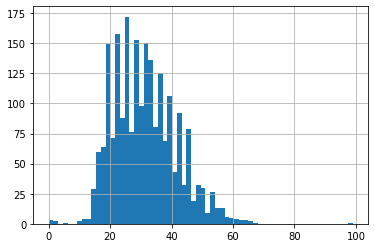

In [42]:
deaths_1990['Age'].value_counts(dropna=False).to_frame().reset_index()
deaths_1990['Age'].hist(bins=64)

In [43]:
deaths_1990['month'].value_counts(dropna=False).to_frame().reset_index()

print((577+657+442)/deaths_1990['month'].value_counts(dropna=False).to_frame().reset_index()['month'].sum())
deaths_1990['month'].value_counts(dropna=False).to_frame().reset_index()


month_year = deaths_1990.groupby('Reporting_year')['month'].value_counts(dropna=False).to_frame()

month_year = month_year.rename(columns={"month": "count"})
month_year = month_year.reset_index()
year = month_year.groupby('Reporting_year')['count'].sum().to_frame().reset_index()

month_year= month_year.merge(year,on='Reporting_year',how='left')
month_year['percent']=month_year['count_x']/month_year['count_y']
summer = month_year[(month_year['month'] == 7) |(month_year['month'] == 6) |(month_year['month'] == 8)|(month_year['month'] == 5)|(month_year['month'] == 9)]

print(summer.groupby('Reporting_year')['percent'].sum().to_frame().min())
print(summer.groupby('Reporting_year')['percent'].sum().to_frame().max())


print(len(deaths2[(deaths2['Post Mortem Interval']=='< 1 day')|(deaths2['Post Mortem Interval']=='< 1 week')]))

0.4443266171792153
percent    0.352941
dtype: float64
percent    0.933333
dtype: float64
1037


In [44]:
summer.groupby('Reporting_year')['percent'].sum().to_frame()

percent
Reporting_year          
1990.0          0.666667
1991.0          0.500000
1992.0          0.555556
1993.0          0.352941
1994.0          0.600000
1995.0          0.583333
1996.0          0.642857
1997.0          0.520000
1998.0          0.933333
1999.0          0.560000
2000.0          0.600000
2001.0          0.797468
2002.0          0.790850
2003.0          0.678788
2004.0          0.604278
2005.0          0.743842
2006.0          0.605714
2007.0          0.618834
2008.0          0.606061
2009.0          0.588832
2010.0          0.580357
2011.0          0.500000
2012.0          0.521472
2013.0          0.655914
2014.0          0.478571
2015.0          0.625850
2016.0          0.615854
2017.0          0.540323
2018.0          0.566929
2019.0          0.500000
2020.0          0.488789
2021.0          0.666667

In [45]:
print(len(deaths_2000[(deaths_2000['month'] == 7) |(deaths_2000['month'] == 6) |(deaths_2000['month'] == 8)|(deaths_2000['month'] == 5)|(deaths_2000['month'] == 9)]))

print(len(summer[(summer['month'] == 7) |(summer['month'] == 6) |(summer['month'] == 8)|(summer['month'] == 5)|(summer['month'] == 9)]))
print(len(deaths_2000[(deaths_2000['month'] == 7) |(deaths_2000['month'] == 6) |(deaths_2000['month'] == 8)|(deaths_2000['month'] == 5)|(deaths_2000['month'] == 9)])/len(deaths_2000))



deaths2[(deaths2['Post Mortem Interval']=='< 1 day')|(deaths2['Post Mortem Interval']=='< 1 week')].groupby('Reporting_year').size()



2199
142
0.6049518569463549


Reporting_year
2000.0    45
2001.0    35
2002.0    60
2003.0    56
2004.0    95
2005.0    83
2006.0    71
2007.0    86
2008.0    60
2009.0    83
2010.0    76
2011.0    39
2012.0    28
2013.0    37
2014.0    14
2015.0    19
2016.0    25
2017.0    11
2018.0    18
2019.0    11
2020.0    39
2021.0    46
dtype: int64

In [46]:
one_day_17 = one_day_deaths_1990[one_day_deaths_1990['Age']<=17]  

mylist2 =['HYPERTHERMIA','DEHYDRATION','EXPOSURE','exposure','dehydration','HYOPERTHERMIA','HEAT','UNDETERMINED','SKELETAL','EXPOSED','unknown_data']
mylist2 = [x.lower() for x in mylist2]

one_day_17['OME Determined COD']=one_day_17['OME Determined COD'].str.lower()
one_day_17['OME Determined COD'].fillna('unknown_data', inplace = True)

one_day_17_exposure = one_day_17[one_day_17['OME Determined COD'].str.contains('|'.join(mylist2))]

print(len(one_day_17_exposure))

33


/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [47]:

print (len(deaths_1990[(deaths_1990['month']==6)&(deaths_1990['Reporting_year']==2021)]))
deaths_1990[(deaths_1990['month']==6)&(deaths_1990['Reporting_year']==2021)]



44


Unnamed: 0 merge_id_x  coverage total  road_distance_miles      Date_x  \
3347        3347    21-2200               7             0.008199  2021-06-01   
3348        3348    21-2222               3             2.204347  2021-06-03   
3349        3349    21-2230               3             0.010000  2021-06-03   
3350        3350    21-2252               3             9.630199  2021-06-05   
3351        3351    21-2259               2             5.080003  2021-06-05   
3352        3352    21-2267               7             4.154067  2021-06-06   
3353        3353    21-2283               7             3.339951  2021-06-07   
3354        3354    21-2293               7             0.862542  2021-06-08   
3355        3355    21-2294               7             0.887569  2021-06-08   
3356        3356    21-2318               0             3.075641  2021-06-11   
3357        3357    21-2332               7             0.730606  2021-06-12   
3358        3358    21-2341               0             2.087183  2021-06-13   
3359        3359    21-2349               3             1.424498  2021-06-13   
3360        3360    21-2356               3             3.892738  2021-06-14   
3361        3361    21-2365               3            12.099866  2021-06-14   
3362        3362    21-2373               5             2.731838  2021-06-15   
3363        3363    21-2375               3             6.407366  2021-06-15   
3364        3364    21-2383               7             0.694099  2021-06-16   
3365        3365    21-2395               2             6.120531  2021-06-17   
3366        3366    21-2396               2             4.628880  2021-06-17   
3367        3367    21-2410               2             2.655646  2021-06-13   
3368        3368    21-2411               4             6.111101  2021-06-18   
3369        3369    21-2437               7             0.977950  2021-06-20   
3370        3370    21-2458               3             8.071396  2021-06-21   
3371        3371    21-2459               2             3.466736  2021-06-21   
3372        3372    21-2460               7             3.141429  2021-06-21   
3373        3373    21-2474               7             1.010338  2021-06-22   
3374        3374    21-2477               7             3.340843  2021-06-22   
3375        3375    21-2478               2             1.575013  2021-06-22   
3376        3376    21-2489               5             5.913162  2021-06-22   
3377        3377    21-2514               4             2.966639  2021-06-24   
3378        3378    21-2526               4             0.796359  2021-06-25   
3379        3379    21-2529               6             0.682005  2021-06-24   
3380        3380    21-2544               3             7.326497  2021-06-26   
3381        3381    21-2562               3             7.359928  2021-06-28   
3382        3382    21-2565               2             4.190744  2021-06-28   
3383        3383    21-2573               2             2.242504  2021-06-28   
3384        3384    21-2579               0            15.182437  2021-06-29   
3385        3385    21-2580               3             4.893360  2021-06-29   
3386        3386    21-2581               5             0.067120  2021-06-29   
3387        3387    21-2587               0             6.381590  2021-06-30   
3388        3388    21-2589               2             2.748949  2021-06-30   
3389        3389    21-2593               7             0.061672  2021-06-30   
3393        3393    21-2669               0            15.182437  2021-06-29   

      month  mountains  town_distance_miles   max_temp   min_temp  \
3347    6.0        0.0             1.780988  32.468620  15.897252   
3348    6.0        6.0             9.993248  38.629261  22.077927   
3349    6.0        6.0             8.157387  37.241707  21.832672   
3350    6.0        0.0            24.449175  39.120281  21.972742   
3351    6.0        0.0            19.185388  36.868813  18.4

In [48]:
print(len(deaths2))
print(len(deaths1))
print(len(deaths_1990))

3912
3914
3772


In [49]:
#June analysis

deaths1[(deaths1['month1']==6)&(deaths1['Reporting_year1']==2021)]['OME Determined COD'].value_counts(dropna=False)



# [(deaths_1990['Post Mortem Interval']=='< 1 day')|(deaths_1990['Post Mortem Interval']=='< 1 week')]
print(len(deaths1[(deaths1['month1']==6)&(deaths1['Reporting_year1']==2021)]))

deaths_june_2021 = deaths1[(deaths1['month1']==6)&(deaths1['Reporting_year1']==2021)]

# ,'unknown_data','UNDETERMINED','SKELETAL'
mylist_exposure =['HYPERTHERMIA','DEHYDRATION','EXPOSURE','exposure','dehydration','HYOPERTHERMIA','HEAT','EXPOSED' ]
mylist_exposure = [x.lower() for x in mylist_exposure]

mylist_unknown =['unknown_data','UNDETERMINED','SKELETAL']
mylist_unknown = [x.lower() for x in mylist_unknown]

mylist3 =['GUN','GSW','stab','GSW','hanging','HOMICIDE','violence']
mylist3 = [x.lower() for x in mylist3]


mylist4 =['BFT','BLUNT']
mylist4 = [x.lower() for x in mylist4]


mylist44 =['HYPERTHERMIA','DEHYDRATION','dehydration','HEAT']
mylist44 = [x.lower() for x in mylist44]


deaths_june_2021['OME Determined COD']=deaths_june_2021['OME Determined COD'].str.lower()


deaths_june_2021['OME Determined COD'].fillna('unknown_data', inplace = True)


deaths_heat_june_2021 = deaths_june_2021[deaths_june_2021['OME Determined COD'].str.contains('|'.join(mylist44))]

print('heat:')
print(len(deaths_heat_june_2021))


deaths_exposure_june_2021 = deaths_june_2021[deaths_june_2021['OME Determined COD'].str.contains('|'.join(mylist_exposure))]

print('exposure:')
print(len(deaths_exposure_june_2021))

print('unknown:')
deaths_unknown_june_2021 = deaths_june_2021[deaths_june_2021['OME Determined COD'].str.contains('|'.join(mylist_unknown))]

print(len(deaths_unknown_june_2021))


deaths_violent_june_2021 = deaths_june_2021[deaths_june_2021['OME Determined COD'].str.contains('|'.join(mylist3))]

print('violent:')
print(len(deaths_violent_june_2021))


deaths_blunt_june_2021 = deaths_june_2021[deaths_june_2021['OME Determined COD'].str.contains('|'.join(mylist4))]
print('blunt:')
print(len(deaths_blunt_june_2021))



# 30 died from exposure to the elements, 11 were skeletal remains where the cause of death was undetermined, and three died from blunt force injuries. 
# Zero died from violence.  


52
heat:
30
exposure:
37
unknown:
12
violent:
0
blunt:
3


/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [50]:
deaths_exposure_june_2021

ML Number                         Name      Sex   Age Reporting Date  \
3347   21-2200  Ramirez Carranza, Filiberto     male  40.0     2021-06-01   
3348   21-2222                 Unidentified     male   NaN     2021-06-03   
3350   21-2252        Jimenez Godinez, Juan     male  20.0     2021-06-05   
3351   21-2259                 Unidentified     male   NaN     2021-06-05   
3352   21-2267         Castro Jaime, Marvin     male  47.0     2021-06-06   
3354   21-2293     Reyes Martinez, Leobardo     male  45.0     2021-06-08   
3355   21-2294         Ruiz Toala, Gilberto     male  24.0     2021-06-08   
3358   21-2341     Ramirez Hernandez, Ruben     male  40.0     2021-06-13   
3359   21-2349          Lopez Lopez, Gabino     male  31.0     2021-06-13   
3361   21-2365         Calderon Reyes, Mely   female  32.0     2021-06-14   
3362   21-2373         Larios Perez, Bertha   female  35.0     2021-06-15   
3363   21-2375        Garzon Brito, Octavio     male  35.0     2021-06-15   
3365   21-2395     Alvarez Rodriguez, Juana   female  34.0     2021-06-17   
3367   21-2410   Bartolon Hernandez, Miguel     male  42.0     2021-06-13   
3368   21-2411         Rochez Mendoza, Arli     male  36.0     2021-06-18   
3369   21-2437       Suarez Flores, Orlando     male  22.0     2021-06-20   
3370   21-2458         Herrera Lopez, Olger     male  29.0     2021-06-21   
3372   21-2460   Peralta Sucuzhanay, Wilmer     male  37.0     2021-06-21   
3373   21-2474         Montoya Suarez, Jose     male  23.0     2021-06-22   
3374   21-2477     Lopez Aguilar, Bonifacio     male  42.0     2021-06-22   
3375   21-2478           Guinac Cruz, Eswin     male  28.0     2021-06-22   
3376   21-2489         Gomez Sanchez, Heber     male  19.0     2021-06-22   
3377   21-2514     Arevalo Gonzalez, Carlos     male  39.0     2021-06-24   
3378   21-2526      Ramirez Matias, Roberto     male  44.0     2021-06-25   
3379   21-2529   Garcia Perfecto, Heriberto     male  28.0     2021-06-24   
3380   21-2544        Aguayo Malpica, Jaime     male  54.0     2021-06-26   
3381   21-2562        Martinez Zelaya, Juan     male  36.0     2021-06-28   
3383   21-2573          Ferreira, Lauzerico     male  42.0     2021-06-28   
3386   21-2581          Pablo Lopez, Lorena   female  29.0     2021-06-29   
3388   21-2589         Ramirez Perez, Romeo     male  27.0     2021-06-30   
3887      None                         None       40   NaN     2021-06-01   
3888      None                         None  female   26.0     2021-06-01   
3889      None                         None   female  23.0     2021-06-13   
3891      None                         None     male  37.0     2021-06-23   
3892      None                         None     male  28.0     2021-06-24   
3893      None                         None     male  51.0     2021-06-26   
3894      None                         None     male  45.0     2021-06-28   

                         Surface Management Location  \
3347                                Private            
3348                   Tohono Oodham Nation            
3350                   Tohono Oodham Nation            
3351                                Private            
3352                                Private            
3354                                Private            
3355                                Private            
3358                   Tohono Oodham Nation            
3359                      US Forest Service            
3361                   Tohono Oodham Nation            
3362                       State of Arizona            
3363                   Tohono Oodham Nation            
3365                   Tohono Oodham Nation            
3367                   Tohono Oodham Nation            
3368                   Tohono Oodham Nation            
3369                                Private            
3370                   Tohono Oodham Nation            
3372                      US Forest Service            
3373          

In [51]:


# deaths_june_2021.to_file('deaths_june_2021.geojson',driver='GeoJSON')


deaths_june_2021['Surface Management'].value_counts(dropna=False)



Tohono Oodham Nation                      23
Private                                   10
Barry Goldwater Range                      8
US Forest Service                          3
State of Arizona                           3
Cabeza Prieta National Wildlife Refuge     3
Organ Pipe Cactus National Monument        1
Buenos Aires National Wildlife Refuge      1
Name: Surface Management, dtype: int64

In [52]:
# Since the start of 2021, the remains of more than 160 migrants were found in Southern Arizona.
deaths_1990.groupby('Reporting_year')['Name'].size()


Reporting_year
1990.0      9
1991.0      6
1992.0      9
1993.0     17
1994.0      5
1995.0     12
1996.0     14
1997.0     25
1998.0     15
1999.0     25
2000.0     75
2001.0     79
2002.0    153
2003.0    165
2004.0    187
2005.0    203
2006.0    175
2007.0    223
2008.0    165
2009.0    197
2010.0    224
2011.0    182
2012.0    163
2013.0    186
2014.0    140
2015.0    147
2016.0    164
2017.0    124
2018.0    127
2019.0    144
2020.0    223
2021.0    189
Name: Name, dtype: int64

In [53]:

# By the end of the year, the remains of 225 migrants had been found, more than any other year since large-scale deaths in the desert of Southern Arizona began in 2000. 
deaths_1990.groupby('Reporting_year')['Name'].size()

#
# Within weeks of Oscar’s calls for help, the remains of 35 migrants were found, making September 2020 the deadliest month since 2013. 
# (This year) After the remains of 45 migrants were found in June, more than any month since 2010, the death toll so far in 2021 is on pace to surpass last year.

# Ladios and Arevalo were among 45 migrants whose remains were found in Southern Arizona in June, the highest monthly total since July 2010


print(len(deaths_1990[(deaths_1990['month']==9)&(deaths_1990['Reporting_year']==2020)]))

print(len(deaths_1990[((deaths_1990['month']>=1)|(deaths_1990['month']<=9))&(deaths_1990['Reporting_year']==2019)]))
print(len(deaths_1990[((deaths_1990['month']>=1)|(deaths_1990['month']<=9))&(deaths_1990['Reporting_year']==2020)]))
print(len(deaths_1990[((deaths_1990['month']>=1)|(deaths_1990['month']<=9))&(deaths_1990['Reporting_year']==2021)]))

deaths_1990.groupby(['Reporting_year','month']).size().to_frame().reset_index()


#the end of the year, the remains of 239 migrants had been found, more than any other year since
#After the remains of 52 migrants were found in June, more than any month since 2010

35
144
223
189


Reporting_year  month   0
0            1990.0    2.0   1
1            1990.0    3.0   1
2            1990.0    5.0   3
3            1990.0    6.0   1
4            1990.0    7.0   2
5            1990.0   10.0   1
6            1991.0    1.0   1
7            1991.0    2.0   1
8            1991.0    3.0   1
9            1991.0    7.0   2
10           1991.0    8.0   1
11           1992.0    2.0   1
12           1992.0    4.0   1
13           1992.0    6.0   2
14           1992.0    7.0   2
15           1992.0    9.0   1
16           1992.0   11.0   2
17           1993.0    1.0   1
18           1993.0    3.0   2
19           1993.0    6.0   1
20           1993.0    7.0   3
21           1993.0    8.0   2
22           1993.0   10.0   3
23           1993.0   11.0   3
24           1993.0   12.0   2
25           1994.0    2.0   1
26           1994.0    6.0   1
27           1994.0    7.0   1
28           1994.0    8.0   1
29           1994.0   10.0   1
30           1995.0    1.0   1
31           1995.0    3.0   1
32           1995.0    5.0   1
33           1995.0    8.0   4
34           1995.0    9.0   2
35           1995.0   10.0   1
36           1995.0   11.0   1
37           1995.0   12.0   1
38           1996.0    2.0   2
39           1996.0    6.0   8
40           1996.0    7.0   1
41           1996.0   10.0   1
42           1996.0   11.0   2
43           1997.0    2.0   1
44           1997.0    3.0   6
45           1997.0    4.0   1
46           1997.0    7.0   2
47           1997.0    8.0   8
48           1997.0    9.0   3
49           1997.0   10.0   1
50           1997.0   11.0   2
51           1997.0   12.0   1
52           1998.0    5.0   1
53           1998.0    6.0   1
54           1998.0    7.0   6
55           1998.0    8.0   2
56           1998.0    9.0   4
57           1998.0   10.0   1
58           1999.0    1.0   2
59           1999.0    2.0   2
60           1999.0    4.0   2
61           1999.0    5.0   1
62           1999.0    6.0   4
63           1999.0    7.0   5
64           1999.0    8.0   2
65           1999.0    9.0   2
66           1999.0   10.0   2
67           1999.0   11.0   3
68           2000.0    1.0   4
69           2000.0    2.0   7
70           2000.0    3.0   6
71           2000.0    4.0   5
72           2000.0    5.0  11
73           2000.0    6.0  15
74           2000.0    7.0   5
75           2000.0    8.0   7
76           2000.0    9.0   7
77           2000.0   10.0   4
78           2000.0   11.0   3
79           2000.0   12.0   1
80           2001.0    1.0   1
81           2001.0    2.0   2
82           2001.0    4.0   2
83           2001.0    5.0  20
84           2001.0    6.0  16
85           2001.0    7.0  16
86           2001.0    8.0   4
87           2001.0    9.0   7
88           2001.0   10.0   1
89           2001.0   11.0   8
90           2001.0   12.0   2
91           2002.0    1.0   3
92           2002.0    2.0   4
93           2002.0    3.0   3
94           2002.0    4.0   7
95           2002.0    5.0  10
96           2002.0    6.0  36
97           2002.0    7.0  24
98           2002.0    8.0  30
99           2002.0    9.0  21
100          2002.0   10.0   8
101          2002.0   11.0   4
102          2002.0   12.0   3
103          2003.0    1.0   6
104          2003.0    2.0  10
105          2003.0    3.0   3
106          2003.0    4.0   7
107          2003.0    5.0  22
108          2003.0    6.0  17
109          2003.0    7.0  39
110          2003.0    8.0  22
111          2003.0    9.0  12
112          2003.0   10.0   8
113          2003.0   11.0  12
114          2003.0   12.0   7
115          2004.0    1.0   7
116          2004.0    2.0  13
117          2004.0    3.0  14
118          2004.0    4.0  16
119          2004.0    5.0  14
120          2004.0    6.0  29
121          2004.0    7.0  30
122          2004.0    8.0  21
123          2004.0    9.0  19
124          2004.0   10.0  10
125          2004.0   11.0   9
126          2004.0   12.0   5
127          2005.0    1.0   5
128   

In [54]:
by_year = deaths_1990.groupby(['Reporting_year']).size().to_frame().reset_index()

by_year.to_csv('deaths_by_year.csv')
by_year

Reporting_year    0
0           1990.0    9
1           1991.0    6
2           1992.0    9
3           1993.0   17
4           1994.0    5
5           1995.0   12
6           1996.0   14
7           1997.0   25
8           1998.0   15
9           1999.0   25
10          2000.0   75
11          2001.0   79
12          2002.0  153
13          2003.0  165
14          2004.0  187
15          2005.0  203
16          2006.0  175
17          2007.0  223
18          2008.0  165
19          2009.0  197
20          2010.0  224
21          2011.0  182
22          2012.0  163
23          2013.0  186
24          2014.0  140
25          2015.0  147
26          2016.0  164
27          2017.0  124
28          2018.0  127
29          2019.0  144
30          2020.0  223
31          2021.0  189

In [55]:
deaths_1990[(deaths_1990['month']==6)&(deaths_1990['Reporting_year']==2021)]


# deaths1[(deaths1['geometry'] ==deaths_1990['geometry'][3865] )]
# 



Unnamed: 0 merge_id_x  coverage total  road_distance_miles      Date_x  \
3347        3347    21-2200               7             0.008199  2021-06-01   
3348        3348    21-2222               3             2.204347  2021-06-03   
3349        3349    21-2230               3             0.010000  2021-06-03   
3350        3350    21-2252               3             9.630199  2021-06-05   
3351        3351    21-2259               2             5.080003  2021-06-05   
3352        3352    21-2267               7             4.154067  2021-06-06   
3353        3353    21-2283               7             3.339951  2021-06-07   
3354        3354    21-2293               7             0.862542  2021-06-08   
3355        3355    21-2294               7             0.887569  2021-06-08   
3356        3356    21-2318               0             3.075641  2021-06-11   
3357        3357    21-2332               7             0.730606  2021-06-12   
3358        3358    21-2341               0             2.087183  2021-06-13   
3359        3359    21-2349               3             1.424498  2021-06-13   
3360        3360    21-2356               3             3.892738  2021-06-14   
3361        3361    21-2365               3            12.099866  2021-06-14   
3362        3362    21-2373               5             2.731838  2021-06-15   
3363        3363    21-2375               3             6.407366  2021-06-15   
3364        3364    21-2383               7             0.694099  2021-06-16   
3365        3365    21-2395               2             6.120531  2021-06-17   
3366        3366    21-2396               2             4.628880  2021-06-17   
3367        3367    21-2410               2             2.655646  2021-06-13   
3368        3368    21-2411               4             6.111101  2021-06-18   
3369        3369    21-2437               7             0.977950  2021-06-20   
3370        3370    21-2458               3             8.071396  2021-06-21   
3371        3371    21-2459               2             3.466736  2021-06-21   
3372        3372    21-2460               7             3.141429  2021-06-21   
3373        3373    21-2474               7             1.010338  2021-06-22   
3374        3374    21-2477               7             3.340843  2021-06-22   
3375        3375    21-2478               2             1.575013  2021-06-22   
3376        3376    21-2489               5             5.913162  2021-06-22   
3377        3377    21-2514               4             2.966639  2021-06-24   
3378        3378    21-2526               4             0.796359  2021-06-25   
3379        3379    21-2529               6             0.682005  2021-06-24   
3380        3380    21-2544               3             7.326497  2021-06-26   
3381        3381    21-2562               3             7.359928  2021-06-28   
3382        3382    21-2565               2             4.190744  2021-06-28   
3383        3383    21-2573               2             2.242504  2021-06-28   
3384        3384    21-2579               0            15.182437  2021-06-29   
3385        3385    21-2580               3             4.893360  2021-06-29   
3386        3386    21-2581               5             0.067120  2021-06-29   
3387        3387    21-2587               0             6.381590  2021-06-30   
3388        3388    21-2589               2             2.748949  2021-06-30   
3389        3389    21-2593               7             0.061672  2021-06-30   
3393        3393    21-2669               0            15.182437  2021-06-29   

      month  mountains  town_distance_miles   max_temp   min_temp  \
3347    6.0        0.0             1.780988  32.468620  15.897252   
3348    6.0        6.0             9.993248  38.629261  22.077927   
3349    6.0        6.0             8.157387  37.241707  21.832672   
3350    6.0        0.0            24.449175  39.120281  21.972742   
3351    6.0        0.0            19.185388  36.868813  18.4

In [56]:
mylist2 =['HYPERTHERMIA','DEHYDRATION','EXPOSURE','exposure','dehydration','HYOPERTHERMIA','HEAT','EXPOSED' ,'unknown_data','UNDETERMINED','SKELETAL']
mylist2 = [x.lower() for x in mylist2]

deaths_1990['OME Determined COD']=deaths_1990['OME Determined COD'].str.lower()
deaths_1990['OME Determined COD'].fillna('unknown_data', inplace = True)

deaths_1990_exposure = deaths_1990[deaths_1990['OME Determined COD'].str.contains('|'.join(mylist2))]

deaths_1990_exposure.groupby(['Reporting_year','month']).size().to_frame().reset_index()
#June record was true among exposure and likly exposue: Ladios and Arevalo were among 
#45 migrants whose remains were found in Southern Arizona in June, the highest monthly total since July 2010

/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Reporting_year  month   0
0            1992.0    9.0   1
1            1994.0    2.0   1
2            1996.0    2.0   1
3            1996.0   11.0   1
4            1999.0    9.0   1
5            1999.0   11.0   1
6            2000.0    1.0   3
7            2000.0    2.0   3
8            2000.0    3.0   1
9            2000.0    4.0   3
10           2000.0    5.0   9
11           2000.0    6.0  14
12           2000.0    7.0   5
13           2000.0    8.0   3
14           2000.0    9.0   4
15           2000.0   10.0   2
16           2000.0   11.0   1
17           2001.0    1.0   1
18           2001.0    2.0   2
19           2001.0    4.0   1
20           2001.0    5.0  19
21           2001.0    6.0  16
22           2001.0    7.0  16
23           2001.0    8.0   3
24           2001.0    9.0   7
25           2001.0   10.0   1
26           2001.0   11.0   5
27           2001.0   12.0   2
28           2002.0    1.0   2
29           2002.0    2.0   2
30           2002.0    3.0   2
31           2002.0    4.0   3
32           2002.0    5.0   8
33           2002.0    6.0  36
34           2002.0    7.0  19
35           2002.0    8.0  22
36           2002.0    9.0  18
37           2002.0   10.0   6
38           2002.0   11.0   3
39           2002.0   12.0   2
40           2003.0    1.0   4
41           2003.0    2.0   8
42           2003.0    3.0   2
43           2003.0    4.0   5
44           2003.0    5.0  21
45           2003.0    6.0  15
46           2003.0    7.0  37
47           2003.0    8.0  19
48           2003.0    9.0   8
49           2003.0   10.0   7
50           2003.0   11.0   5
51           2003.0   12.0   7
52           2004.0    1.0   7
53           2004.0    2.0   8
54           2004.0    3.0   7
55           2004.0    4.0   8
56           2004.0    5.0   9
57           2004.0    6.0  19
58           2004.0    7.0  28
59           2004.0    8.0  19
60           2004.0    9.0  11
61           2004.0   10.0   5
62           2004.0   11.0   8
63           2004.0   12.0   3
64           2005.0    1.0   1
65           2005.0    2.0   1
66           2005.0    3.0   1
67           2005.0    4.0   6
68           2005.0    5.0  25
69           2005.0    6.0  17
70           2005.0    7.0  67
71           2005.0    8.0  18
72           2005.0    9.0  16
73           2005.0   10.0   6
74           2005.0   11.0   3
75           2005.0   12.0   5
76           2006.0    1.0   1
77           2006.0    2.0   2
78           2006.0    3.0  14
79           2006.0    4.0  12
80           2006.0    5.0  12
81           2006.0    6.0  23
82           2006.0    7.0  32
83           2006.0    8.0  11
84           2006.0    9.0   7
85           2006.0   10.0   2
86           2006.0   11.0   6
87           2006.0   12.0   6
88           2007.0    1.0  10
89           2007.0    2.0   8
90           2007.0    3.0   7
91           2007.0    4.0   7
92           2007.0    5.0  21
93           2007.0    6.0  31
94           2007.0    7.0  42
95           2007.0    8.0  19
96           2007.0    9.0   4
97           2007.0   10.0  11
98           2007.0   11.0   8
99           2007.0   12.0   8
100          2008.0    1.0   4
101          2008.0    2.0   7
102          2008.0    3.0   3
103          2008.0    4.0  11
104          2008.0    5.0  10
105          2008.0    6.0  34
106          2008.0    7.0  16
107          2008.0    8.0  10
108          2008.0    9.0  10
109          2008.0   10.0   4
110          2008.0   11.0   5
111          2008.0   12.0  11
112          2009.0    1.0   4
113          2009.0    2.0   4
114          2009.0    3.0  10
115          2009.0    4.0   4
116          2009.0    5.0  14
117          2009.0    6.0  13
118          2009.0    7.0  33
119          2009.0    8.0  25
120          2009.0    9.0  13
121          2009.0   10.0   8
122          2009.0   11.0  10
123          2009.0   12.0  12
124          2010.0    1.0   7
125          2010.0    2.0   5
126          2010.0    3.0   8
127          2010.0    4.0  10
128   

In [57]:
print(len(deaths_1990_exposure))

3088


In [58]:
# The remains of 161 migrants were found in Southern Arizona from January to August, 
# compared to 145 during the same period last year. 
janAug = [1,2,3,4,5,6,7,8,9]
deaths1[(deaths1['month1'].isin(janAug))].groupby(['Reporting_year1']).size().to_frame().reset_index()


Reporting_year1    0
0            1982.0    1
1            1985.0    2
2            1990.0    8
3            1991.0    6
4            1992.0    7
5            1993.0    9
6            1994.0    4
7            1995.0    9
8            1996.0   11
9            1997.0   21
10           1998.0   14
11           1999.0   20
12           2000.0   67
13           2001.0   68
14           2002.0  138
15           2003.0  138
16           2004.0  163
17           2005.0  179
18           2006.0  176
19           2007.0  202
20           2008.0  136
21           2009.0  159
22           2010.0  186
23           2011.0  141
24           2012.0  136
25           2013.0  172
26           2014.0  115
27           2015.0  124
28           2016.0  128
29           2017.0  106
30           2018.0  107
31           2019.0  124
32           2020.0  192
33           2021.0  222

In [59]:
#recent deaths for curt
deaths_1990['Post Mortem Interval'].value_counts(dropna=False)


# Just in June, the remains of 16 migrants were found within hours of their deaths. 
# Since 2000, that has been the case with more than 1,000 migrants.

count_recent_deaths = deaths_1990[(deaths_1990['Post Mortem Interval']=='< 1 day')|(deaths_1990['Post Mortem Interval']=='< 1 week')].groupby('Reporting_year').size()
# print(count_recent_deaths_one_day[0].sum())
count_recent_deaths_one_day= deaths_1990[deaths_1990['Post Mortem Interval']=='< 1 day'].groupby('Reporting_year').size().to_frame().reset_index()

count_recent_deaths_one_day

Reporting_year   0
0           2000.0  45
1           2001.0  35
2           2002.0  60
3           2003.0  56
4           2004.0  95
5           2005.0  83
6           2006.0  71
7           2007.0  86
8           2008.0  60
9           2009.0  83
10          2010.0  76
11          2011.0  39
12          2012.0  28
13          2013.0  37
14          2014.0  14
15          2015.0  19
16          2016.0  25
17          2017.0  11
18          2018.0  18
19          2019.0  11
20          2020.0  39
21          2021.0  46

In [60]:
deaths1[deaths1['Post Mortem Interval']=='< 1 day'].groupby(['Reporting_year1','month1']).size().to_frame()

0
Reporting_year1 month1    
2000.0          1.0      1
                2.0      6
                3.0      4
                4.0      4
                5.0      7
                6.0      7
                7.0      1
                8.0      6
                9.0      4
                10.0     3
                11.0     2
2001.0          4.0      1
                5.0     10
                6.0      7
                7.0      8
                8.0      3
                9.0      4
                11.0     2
2002.0          1.0      2
                2.0      2
                3.0      3
                4.0      5
                5.0      4
                6.0     10
                7.0     10
                8.0     14
                9.0      7
                10.0     2
                12.0     1
2003.0          1.0      2
                2.0      2
                4.0      3
                5.0     10
                6.0      7
                7.0     12
                8.0      8
                9.0      7
                11.0     5
2004.0          2.0      6
                3.0     10
                4.0     12
                5.0      8
                6.0     22
                7.0     11
                8.0      8
                9.0     11
                10.0     3
                11.0     1
                12.0     3
2005.0          1.0      4
                2.0      6
                3.0      7
                4.0      4
                5.0     10
                6.0      4
                7.0     31
                8.0      2
                9.0      8
                10.0     1
                11.0     3
                12.0     3
2006.0          1.0      2
                2.0      2
                3.0     12
                4.0      6
                5.0      9
                6.0     16
                7.0     14
                8.0      3
                9.0      3
                10.0     2
                11.0     1
                12.0     1
2007.0          1.0      7
                2.0      6
                3.0      6
                4.0      8
                5.0      9
                6.0     20
                7.0     14
                8.0     11
                9.0      3
                10.0     1
                12.0     1
2008.0          2.0      4
                4.0     11
                5.0      4
                6.0     15
                7.0      6
                8.0     10
                10.0     5
                12.0     5
2009.0          1.0      1
                2.0      3
                3.0      8
                4.0      6
                5.0      8
                6.0     18
                7.0     17
                8.0     10
                9.0      3
                11.0     4
                12.0     5
2010.0          1.0      7
                2.0      7
                3.0      2
                4.0      5
                5.0      9
                6.0     13
                7.0     19
                8.0      3
                9.0      4
                10.0     4
                11.0     3
2011.0          1.0      3
                2.0      1
                3.0      3
                4.0      2
                5.0      1
                6.0     11
                7.0      5
                8.0      5
                9.0      2
                10.0     2
                11.0     3
                12.0     1
2012.0          1.0      1
                2.0      2
                4.0      3
                5.0      6
                6.0      8
                7.0      5
                8.0      1
                12.0     2
2013.0          2.0      2
                3.0      3
                4.0      6
                5.0      7
                6.0      6
                7.0      6
                8.0      3
                9.0      1
                10.0     2
                11.0     1
2014.0          1.0      1
                3.0      2
                5.0      1
  

In [61]:
deaths1[(deaths1['month1']==6)&(deaths1['Reporting_year1']==2021)]['Post Mortem Interval'].value_counts(dropna=False).to_frame()

Post Mortem Interval
< 1 day                          16
< 1 week                         13
NaN                               8
< 5 weeks                         5
> 6-8 months                      4
< 3 months                        3
< 3 weeks                         2
< 6-8 months                      1

<AxesSubplot:title={'center':'count_recent_deaths_(one_day_and_one_week)'}, xlabel='Reporting_year'>

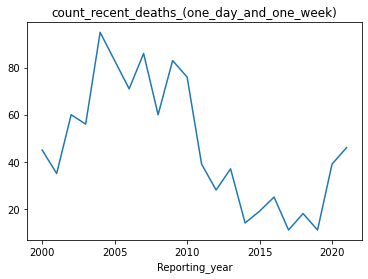

In [62]:


count_recent_deaths.to_csv('../migrant_deaths/data_for_each_death/data_for_curt/count_recent_deaths_(one_day_and_one_week).csv')
count_recent_deaths_one_day.to_csv('../migrant_deaths/data_for_each_death/data_for_curt/count_recent_deaths_(one_day).csv')

count_recent_deaths.plot(kind='line',x='Reporting_year',title='count_recent_deaths_(one_day_and_one_week)')



In [63]:
#seasonality

#since 2000

deaths_2000 = deaths3[deaths3['Reporting_year']>=2000]
deaths_2000_month = deaths_2000.groupby('month').size()
deaths_2000_month.to_csv('../migrant_deaths/data_for_each_death/data_for_curt/seasonality_of_deaths_by_month_since_2000.csv')


deaths_2000_month_year = deaths_2000.groupby(['Reporting_year','month']).size().to_frame().reset_index()
deaths_2000_month_year

Reporting_year  month   0
0            2000.0    1.0   4
1            2000.0    2.0   7
2            2000.0    3.0   6
3            2000.0    4.0   5
4            2000.0    5.0  11
5            2000.0    6.0  15
6            2000.0    7.0   5
7            2000.0    8.0   7
8            2000.0    9.0   7
9            2000.0   10.0   4
10           2000.0   11.0   3
11           2000.0   12.0   1
12           2001.0    1.0   1
13           2001.0    2.0   2
14           2001.0    4.0   2
15           2001.0    5.0  20
16           2001.0    6.0  16
17           2001.0    7.0  16
18           2001.0    8.0   4
19           2001.0    9.0   7
20           2001.0   10.0   1
21           2001.0   11.0   8
22           2001.0   12.0   2
23           2002.0    1.0   3
24           2002.0    2.0   4
25           2002.0    3.0   3
26           2002.0    4.0   7
27           2002.0    5.0  10
28           2002.0    6.0  36
29           2002.0    7.0  24
30           2002.0    8.0  30
31           2002.0    9.0  21
32           2002.0   10.0   8
33           2002.0   11.0   4
34           2002.0   12.0   3
35           2003.0    1.0   6
36           2003.0    2.0  10
37           2003.0    3.0   3
38           2003.0    4.0   7
39           2003.0    5.0  22
40           2003.0    6.0  17
41           2003.0    7.0  39
42           2003.0    8.0  22
43           2003.0    9.0  12
44           2003.0   10.0   8
45           2003.0   11.0  12
46           2003.0   12.0   7
47           2004.0    1.0   7
48           2004.0    2.0  13
49           2004.0    3.0  14
50           2004.0    4.0  16
51           2004.0    5.0  14
52           2004.0    6.0  29
53           2004.0    7.0  30
54           2004.0    8.0  21
55           2004.0    9.0  19
56           2004.0   10.0  10
57           2004.0   11.0   9
58           2004.0   12.0   5
59           2005.0    1.0   5
60           2005.0    2.0   7
61           2005.0    3.0   7
62           2005.0    4.0   9
63           2005.0    5.0  27
64           2005.0    6.0  18
65           2005.0    7.0  69
66           2005.0    8.0  18
67           2005.0    9.0  19
68           2005.0   10.0   6
69           2005.0   11.0   7
70           2005.0   12.0  11
71           2006.0    1.0   4
72           2006.0    2.0   5
73           2006.0    3.0  20
74           2006.0    4.0  18
75           2006.0    5.0  16
76           2006.0    6.0  30
77           2006.0    7.0  35
78           2006.0    8.0  13
79           2006.0    9.0  12
80           2006.0   10.0   7
81           2006.0   11.0   7
82           2006.0   12.0   8
83           2007.0    1.0  18
84           2007.0    2.0  13
85           2007.0    3.0  11
86           2007.0    4.0  14
87           2007.0    5.0  27
88           2007.0    6.0  35
89           2007.0    7.0  46
90           2007.0    8.0  23
91           2007.0    9.0   7
92           2007.0   10.0  12
93           2007.0   11.0   9
94           2007.0   12.0   8
95           2008.0    1.0   4
96           2008.0    2.0  10
97           2008.0    3.0   3
98           2008.0    4.0  17
99           2008.0    5.0  12
100          2008.0    6.0  37
101          2008.0    7.0  21
102          2008.0    8.0  20
103          2008.0    9.0  10
104          2008.0   10.0   9
105          2008.0   11.0   5
106          2008.0   12.0  17
107          2009.0    1.0   7
108          2009.0    2.0   8
109          2009.0    3.0  17
110          2009.0    4.0  10
111          2009.0    5.0  15
112          2009.0    6.0  26
113          2009.0    7.0  34
114          2009.0    8.0  26
115          2009.0    9.0  15
116          2009.0   10.0   8
117          2009.0   11.0  15
118          2009.0   12.0  16
119          2010.0    1.0  15
120          2010.0    2.0  16
121          2010.0    3.0  10
122          2010.0    4.0  14
123          2010.0    5.0  15
124          2010.0    6.0  23
125          2010.0    7.0  57
126          2010.0    8.0  21
127          2010.0    9.0  14
128   

In [64]:



#since 2015
deaths_2015 = deaths3[deaths3['Reporting_year']>=2015]
deaths_2015_month = deaths_2015.groupby('month').size()
deaths_2015_month.to_csv('../migrant_deaths/data_for_each_death/data_for_curt/seasonality_of_deaths_by_month_since_2015.csv')


print(len(deaths_2015))
deaths_2015

1118


Unnamed: 0  merge_id_x  coverage total  road_distance_miles      Date_x  \
2397        2397    15-00045               3             8.900399  2015-01-04   
2398        2398    15-00098               3             5.331820  2015-01-10   
2399        2399    15-00127               3            12.583502  2015-01-09   
2400        2400    15-00239               4             8.167099  2015-01-27   
2401        2401    15-00245               3             2.990020  2015-01-25   
...          ...         ...             ...                  ...         ...   
3755        3755  MC21-04938               7             0.310759  2021-05-11   
3756        3756  MC21-04939               6             1.812335  2021-05-11   
3757        3757   MC21-1252               3             9.086314  2021-01-22   
3758        3758   MC21-1315               5             6.624026  2021-01-27   
3759        3759   MC21-4954               7             0.312577  2021-05-12   

      month  mountains  town_distance_miles   max_temp   min_temp  \
2397    1.0        0.0            17.221295  18.294706   0.482973   
2398    1.0        5.0            29.127692  18.039484   6.051902   
2399    1.0        0.0            30.286498  20.509708  13.392371   
2400    1.0        0.0            15.277901  22.405790  10.182634   
2401    1.0        6.0            10.932861  22.426878   8.728895   
...     ...        ...                  ...        ...        ...   
3755    5.0        0.0            33.684151  33.367363  18.938238   
3756    5.0        0.0            34.076932  33.367363  18.938238   
3757    1.0        6.0            22.748120  18.960938  10.856102   
3758    1.0        6.0            24.500015  15.330814   2.872386   
3759    5.0        0.0            33.679388  36.000381  19.623528   

      Reporting_year  border_distance_miles  Longitude_x  Latitude_x  \
2397          2015.0               9.799059  -112.151317   31.825780   
2398          2015.0               3.065591  -111.453250   31.501317   
2399          2015.0              13.099974  -112.581010   32.009650   
2400          2015.0              58.543514  -111.656800   32.425000   
2401          2015.0              26.893754  -111.695567   31.947183   
...              ...                    ...          ...         ...   
3755          2021.0              67.622514  -112.822530   32.924662   
3756          2021.0              67.772417  -112.890648   32.948507   
3757          2021.0              65.591991  -112.204100   32.704150   
3758          2021.0              65.413142  -112.390550   32.758600   
3759          2021.0              67.626595  -112.822330   32.924662   

       ML Number                              Name           Sex   Age  \
2397    15-00045                      Unidentified          male   NaN   
2398    15-00098                Yaque Gomez, Pedro          male  39.0   
2399    15-00127                      Unidentified          male   NaN   
2400    15-00239  MALDONADO DEARCIA, DILVER ODILSE          male  20.0   
2401    15-00245  ANDRADE LUNA, JOSE DE LOS SANTOS          male  25.0   
...          ...                               ...           ...   ...   
3755  MC21-04938               Diego Domingo Lucas          male   NaN   
3756  MC21-04939                      Unidentified          male   NaN   
3757   MC21-1252                      Unidentified          male   NaN   
3758   MC21-1315                      Unidentified  undetermined   NaN   
3759   MC21-4954              Kevin Nelson Aguilar          male   NaN   

     Reporting Date                     Surface Management  \
2397     2015-01-04                   Tohono Oodham Nation   
2398     2015-01-10  Buenos Aires National Wildlife Refuge   
2399     2015-01-09                   Tohono Oodham Nation   
2400     2015-01-27      Ironwood Forest National Monument   
2401     2015-01-25                   Tohono Oodham Nation   
...             ...                                    ...   
3755     2021-05

512


/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


512


<AxesSubplot:title={'center':'exposure_by_year'}, xlabel='Reporting_year'>

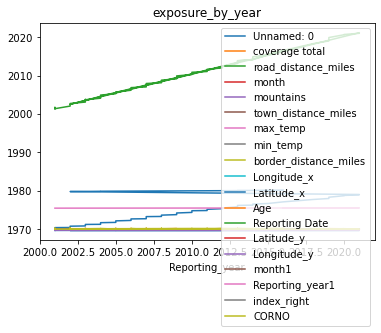

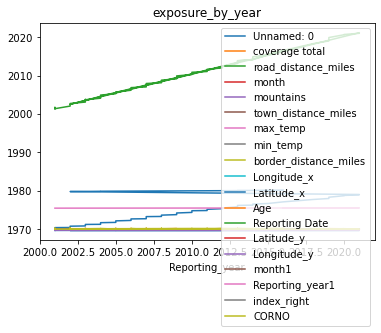

In [65]:


deaths_1990['OME Determined COD'].value_counts(dropna=False).to_frame()

mylist =['HYPERTHERMIA','DEHYDRATION','EXPOSURE','exposure','dehydration','HYOPERTHERMIA','HEAT']
deaths_1990['OME Determined COD']=deaths_1990['OME Determined COD'].str.lower()

deaths_1990['OME Determined COD'].fillna('unknown_data', inplace = True)
exposure = deaths_1990[deaths_1990['OME Determined COD'].str.contains('|'.join(mylist))]

print(len(exposure))

exposure.to_csv('../migrant_deaths/data_for_each_death/data_for_curt/exposure_by_year.csv')

exposure.plot(kind='line',x='Reporting_year',title='exposure_by_year')





mylist2 =['HYPERTHERMIA','DEHYDRATION','EXPOSURE','exposure','dehydration','HYOPERTHERMIA','HEAT','UNDETERMINED','SKELETAL','unknown_data']
exposure_unknown = deaths_1990[deaths_1990['OME Determined COD'].str.contains('|'.join(mylist2))]
print(len(exposure_unknown))

exposure_unknown.to_csv('../migrant_deaths/data_for_each_death/data_for_curt/exposure_unknown_by_year.csv')

exposure_unknown.plot(kind='line',x='Reporting_year',title='exposure_by_year')



In [66]:
# Just in June, the remains of 16 migrants were found within 24 hours of their deaths, more than all such instances in 2019. Since 2000, that has been the case with more than 1,000 migrants.

print(len(deaths_1990[(deaths_1990['Post Mortem Interval'] == '< 1 day')&(deaths_1990['month'] == 6)&(deaths_1990['Reporting_year'] == 2021)]))


deaths_1990[deaths_1990['Post Mortem Interval'] == '< 1 day'].groupby('Reporting_year').size().to_frame()



16


0
Reporting_year    
2000.0          45
2001.0          35
2002.0          60
2003.0          56
2004.0          95
2005.0          83
2006.0          71
2007.0          86
2008.0          60
2009.0          83
2010.0          76
2011.0          39
2012.0          28
2013.0          37
2014.0          14
2015.0          19
2016.0          25
2017.0          11
2018.0          18
2019.0          11
2020.0          39
2021.0          46

0
Reporting_year    
2000.0          45
2001.0          35
2002.0          60
2003.0          56
2004.0          95
2005.0          83
2006.0          71
2007.0          86
2008.0          60
2009.0          83
2010.0          76
2011.0          39
2012.0          28
2013.0          37
2014.0          14
2015.0          19
2016.0          25
2017.0          11
2018.0          18
2019.0          11
2020.0          39
2021.0          46

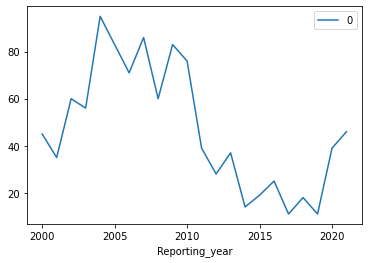

In [67]:
#How are one day deaths changeing?
one_day_deaths_1990_year=deaths_1990[deaths_1990['Post Mortem Interval'] == '< 1 day'].groupby('Reporting_year').size().to_frame()
one_day_deaths_1990_year.plot(kind='line')
one_day_deaths_1990_year



In [68]:
# encounters correlation

encounters = pd.read_csv('../migrant_deaths/data_for_each_death/BP_encounters.csv')
encounters['az_encounters']=encounters['Yuma Border encounters']+encounters['Tucson Border encounters']

encounters


Year  Tucson Border encounters  Yuma Border encounters  Unnamed: 3  \
0   2021.0                  173476.0                 91841.0    233361.0   
1   2020.0                   66076.0                  8804.0     74880.0   
2   2019.0                   63490.0                 68269.0    131759.0   
3   2018.0                   52172.0                 26244.0     78416.0   
4   2017.0                   38657.0                 12847.0     51504.0   
5   2016.0                   64891.0                 14170.0     79061.0   
6   2015.0                   63397.0                  7142.0     70539.0   
7   2014.0                   87915.0                  5902.0     93817.0   
8   2013.0                  120939.0                  6106.0    127045.0   
9   2012.0                  120000.0                  6500.0    126500.0   
10  2011.0                  123285.0                  5833.0    129118.0   
11  2010.0                  212202.0                  7116.0    219318.0   
12  2009.0                  241673.0                  6951.0    248624.0   
13  2008.0                  317696.0                  8363.0    326059.0   
14  2007.0                  378239.0                 37992.0    416231.0   
15  2006.0                  392074.0                118549.0    510623.0   
16  2005.0                  439079.0                138438.0    577517.0   
17  2004.0                  491771.0                 98060.0    589831.0   
18  2003.0                  347263.0                 56638.0    403901.0   
19  2002.0                  333648.0                 42654.0    376302.0   
20  2001.0                  449675.0                 78385.0    528060.0   
21  2000.0                  616346.0                108747.0    725093.0   
22  1999.0                  470449.0                 93388.0    563837.0   
23  1998.0                  387406.0                 76195.0    463601.0   
24  1997.0                  272397.0                 30177.0    302574.0   
25  1996.0                  305348.0                 28310.0    333658.0   
26  1995.0                  227529.0                 20894.0    248423.0   
27  1994.0                  139473.0                 21211.0    160684.0   
28  1993.0                   92639.0                 23548.0    116187.0   
29  1992.0                   71036.0                 24892.0     95928.0   
30  1991.0                   59728.0                 28646.0     88374.0   
31  1990.0                   53061.0                 36387.0     89448.0   
32     NaN                       NaN                     NaN         NaN   
33     NaN                       NaN                     NaN         NaN   
34     NaN                       NaN                     NaN     51504.0   
35     NaN                       NaN                     NaN    725093.0   
36     NaN                       NaN                     NaN         NaN   
37     NaN                       NaN                     NaN     51500.0   
38     NaN                       NaN                     NaN    725000.0   
39     NaN                       NaN                     NaN         NaN   
40     NaN                       NaN                     NaN        77.0   
41     NaN                       NaN                     NaN        49.0   
42     NaN                       NaN                     NaN         NaN   

      Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8 Unnamed: 9  \
0            NaN         NaN         NaN         NaN         NaN        NaN   
1    2.116466346         NaN         NaN         NaN         NaN      June    
2   -0.431689676         NaN         NaN         NaN         NaN     12,410   
3     0.68025658         NaN         NaN         NaN         NaN     18,405   
4    0.522522523         NaN         NaN         NaN         NaN     30,815   
5   -0.348553648         NaN         NaN         NaN         NaN        NaN   
6      0.1208126         NaN         NaN         NaN         NaN        NaN   
7   -0.248121343         NaN 

Year      int64
deaths    int64
dtype: object


/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


az_encounters  deaths    Year
0        265317.0     215  2021.0
1         74880.0     215  2020.0
2        131759.0     137  2019.0
3         78416.0     128  2018.0
4         51504.0     136  2017.0
5         79061.0     156  2016.0
6         70539.0     146  2015.0
7         93817.0     140  2014.0
8        127045.0     194  2013.0
9        126500.0     169  2012.0
10       129118.0     176  2011.0
11       219318.0     232  2010.0
12       248624.0     188  2009.0
13       326059.0     160  2008.0
14       416231.0     221  2007.0
15       510623.0     178  2006.0
16       577517.0     199  2005.0
17       589831.0     192  2004.0
18       403901.0     153  2003.0
19       376302.0     156  2002.0
20       528060.0      73  2001.0
21       725093.0      74  2000.0
22       563837.0      22  1999.0
23       463601.0      18  1998.0
24       302574.0      24  1997.0
25       333658.0      14  1996.0
26       248423.0      10  1995.0
27       160684.0      10  1994.0
28       116187.0      14  1993.0
29        95928.0       7  1992.0
30        88374.0       6  1991.0
31        89448.0       9  1990.0

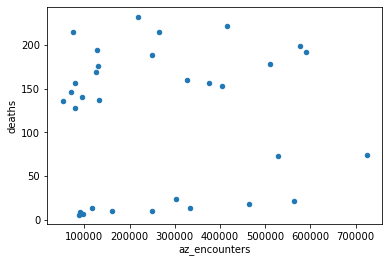

In [69]:



deaths_1990['Year']=deaths_1990['Reporting Date'].dt.to_period('A-OCT')
deaths_1990

deaths_year = deaths_1990.groupby('Year').size().to_frame()



deaths_year=deaths_year.reset_index()
deaths_year.columns =['Year','deaths'] 
deaths_year
deaths_year['Year'] = pd.to_numeric(deaths_year['Year'].astype(str))


print(deaths_year.dtypes)
enounters_deaths = encounters.merge(deaths_year,on='Year')
enounters_deaths = enounters_deaths[['az_encounters','deaths','Year']]


enounters_deaths.plot(kind='scatter',x='az_encounters',y='deaths')

enounters_deaths.corr()
enounters_deaths

az_encounters  deaths    Year
0        265317.0      46  2021.0
1         74880.0      39  2020.0
2        131759.0      11  2019.0
3         78416.0      18  2018.0
4         51504.0      11  2017.0
5         79061.0      25  2016.0
6         70539.0      19  2015.0
7         93817.0      14  2014.0
8        127045.0      37  2013.0
9        126500.0      28  2012.0
10       129118.0      39  2011.0
11       219318.0      76  2010.0
12       248624.0      83  2009.0
13       326059.0      60  2008.0
14       416231.0      86  2007.0
15       510623.0      71  2006.0
16       577517.0      83  2005.0
17       589831.0      95  2004.0
18       403901.0      56  2003.0
19       376302.0      60  2002.0
20       528060.0      35  2001.0
21       725093.0      45  2000.0

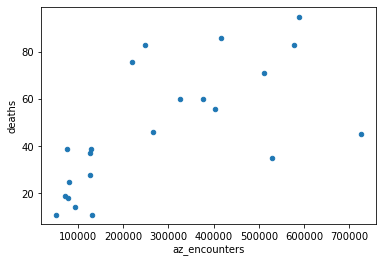

In [70]:
# encounters correlation one day deaths

encounters = pd.read_csv('../migrant_deaths/data_for_each_death/BP_encounters.csv')
encounters['az_encounters']=encounters['Yuma Border encounters']+encounters['Tucson Border encounters']

encounters

deaths_year = deaths_1990[(deaths_1990['Post Mortem Interval'] == '< 1 day')|(deaths_1990['Post Mortem Interval']=='< 1 week')].groupby('Reporting_year').size().to_frame()



deaths_year=deaths_year.reset_index()
deaths_year.columns =['Year','deaths'] 
deaths_year['Year'] = deaths_year['Year'].astype(int)
deaths_year.dtypes
enounters_deaths = encounters.merge(deaths_year,on='Year')
enounters_deaths = enounters_deaths[['az_encounters','deaths','Year']]

enounters_deaths.plot(kind='scatter',x='az_encounters',y='deaths')

enounters_deaths.corr()

enounters_deaths


In [71]:
deaths_year[deaths_year['Year']>=1990]['deaths'].mean()

47.13636363636363

Reporting_year  town_distance_miles
0           1981.0            47.437866
1           1982.0            18.418180
2           1985.0            17.100734
3           1987.0             0.533132
4           1990.0             2.737990
5           1991.0             4.007784
6           1992.0             8.712476
7           1993.0            13.555191
8           1994.0            15.345358
9           1995.0             8.252842
10          1996.0             8.008947
11          1997.0             8.298845
12          1998.0            11.652329
13          1999.0            11.381324
14          2000.0            11.752976
15          2001.0            15.019935
16          2002.0            13.164789
17          2003.0            14.261095
18          2004.0            14.526692
19          2005.0            14.322698
20          2006.0            13.259800
21          2007.0            14.415886
22          2008.0            13.419239
23          2009.0            15.467314
24          2010.0            16.643094
25          2011.0            17.356037
26          2012.0            16.499223
27          2013.0            17.553433
28          2014.0            17.879366
29          2015.0            18.395154
30          2016.0            18.701125
31          2017.0            19.763517
32          2018.0            18.684895
33          2019.0            18.699209
34          2020.0            17.107537
35          2021.0            17.251680

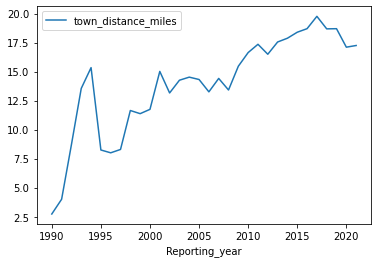

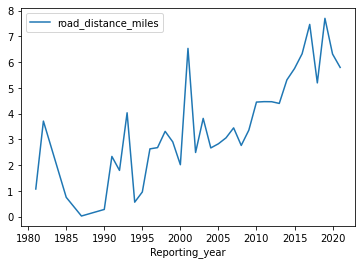

In [72]:
# distance from town / roads



avg_road_year = deaths2.groupby('Reporting_year')['road_distance_miles'].mean().to_frame().reset_index()

avg_road_year.to_csv('../migrant_deaths/data_for_each_death/data_for_curt/average_distance_ROAD_by_year.csv')
# avg_road_year.plot(kind='line',x='Reporting_year')


avg_town_year = deaths2.groupby('Reporting_year')['town_distance_miles'].mean().to_frame().reset_index()
avg_town_year.to_csv(gg)
# avg_town_year.plot(kind='line',x='Reporting_year')



deaths_1990_bab_town = deaths_1990[deaths_1990['CORNO']==7].groupby('Reporting_year')['town_distance_miles'].mean().to_frame().reset_index()
# deaths_1990_bab_town.plot(kind='line',x='Reporting_year')

deaths_1990_bab_road = deaths_1990[deaths_1990['CORNO']==7].groupby('Reporting_year')['road_distance_miles'].mean().to_frame().reset_index()










town_merge = deaths_1990_bab_town.merge(avg_town_year,on='Reporting_year')
avg_town_year[avg_town_year['Reporting_year']>=1990].plot(kind='line',x='Reporting_year')

road_merge = deaths_1990_bab_road.merge(avg_road_year,on='Reporting_year')

avg_road_year.plot(kind='line',x='Reporting_year')

avg_town_year



In [73]:

pd.set_option('display.max_rows', 3877)
deaths_1990.sort_values(by=['town_distance_miles'])[['town_distance_miles']].reset_index()

index  town_distance_miles
0       341             0.000000
1      2578             0.000000
2       647             0.000000
3       741             0.000000
4      3502             0.000000
5      2594             0.000000
6      3497             0.000000
7      3496             0.000000
8       299             0.000000
9       117             0.000000
10     3494             0.000000
11     3493             0.000000
12      737             0.000000
13      736             0.000000
14      132             0.000000
15      133             0.000000
16     2678             0.000000
17     3483             0.000000
18      136             0.000000
19      927             0.000000
20      320             0.000000
21     1204             0.000000
22      113             0.000000
23     3532             0.000000
24      191             0.000000
25     3531             0.000000
26     3530             0.000000
27     2482             0.000000
28      911             0.000000
29     3529             0.000000
30      101             0.000000
31     3527             0.000000
32     3525             0.000000
33     3524             0.000000
34     3523             0.000000
35     3522             0.000000
36     3521             0.000000
37     2513             0.000000
38     3516             0.000000
39      334             0.000000
40     1217             0.000000
41      327             0.000000
42     1173             0.000000
43      632             0.000000
44     3478             0.000000
45      939             0.000000
46      949             0.000000
47     3107             0.000000
48      171             0.000000
49      726             0.000000
50     1059             0.000000
51     3147             0.000000
52     3186             0.000000
53      703             0.000000
54     3105             0.000000
55     1025             0.000000
56     1023             0.000000
57     3369             0.000000
58      724             0.000000
59     3226             0.000000
60     1001             0.000000
61     3241             0.000000
62     3336             0.000000
63     3301             0.000000
64     3213             0.000000
65     3087             0.000000
66     1084             0.000000
67     1094             0.000000
68     3471             0.000000
69      730             0.000000
70     3469             0.000000
71     3467             0.000000
72     2866             0.000000
73     3463             0.000000
74     3462             0.000000
75     3461             0.000000
76     3460             0.000000
77      668             0.000000
78      273             0.000000
79      153             0.000000
80     1148             0.000000
81      264             0.000000
82      943             0.000000
83     3454             0.000000
84      262             0.000000
85      518             0.000000
86     2979             0.000000
87     3477             0.000000
88     3533             0.000000
89     3313             0.000000
90     2063             0.000000
91       29             0.000000
92     1984             0.000000
93      811             0.000000
94     3642             0.000000
95     1998             0.000000
96      579             0.000000
97      423             0.000000
98      824             0.000000
99     1973             0.000000
100    2052             0.000000
101      39             0.000000
102      40             0.000000
103    2060             0.000000
104     414             0.000000
105    3541             0.000000
106     592             0.000000
107      45             0.000000
108    1558             0.000000
109    2053             0.000000
110    2125             0.000000
111    1969             0.000000
112    3660             0.000000
113    1509             0.000000
114       9             0.000000
115    3767             0.000000
116     484             0.000000
117    1792             0.000000
118     477             0.000000
119     475             0.000000
120      15  

In [74]:
deaths_1990.sort_values(by=['road_distance_miles','town_distance_miles'])[['road_distance_miles','town_distance_miles']].reset_index()

index  road_distance_miles  town_distance_miles
0      3202             0.000005             8.303793
1      3654             0.000036             8.342343
2       787             0.000056            12.714917
3       602             0.000058            18.717675
4       439             0.000107             7.776000
5       384             0.000116             8.734835
6       634             0.000148            21.818366
7      1792             0.000167             0.000000
8       656             0.000208             0.002073
9       151             0.000212            20.786016
10     3226             0.000272             0.000000
11      569             0.000304            25.254512
12       63             0.000313             5.498684
13     3581             0.000323             3.899933
14     3664             0.000345             6.817564
15      458             0.000345            21.911346
16     3773             0.000359             0.810140
17     3775             0.000363             4.461097
18      564             0.000392             0.000000
19       31             0.000407             4.889687
20      622             0.000426            12.065219
21      884             0.000437             0.000000
22     2678             0.000450             0.000000
23      420             0.000536             0.773182
24      339             0.000575             5.283536
25       32             0.000581            15.808792
26     3431             0.000590             9.433755
27     3421             0.000604             4.678516
28     1340             0.000610            15.299097
29      898             0.000611             5.272445
30     1062             0.000630             0.191515
31     3778             0.000654             7.309634
32     1050             0.000654            13.769811
33      726             0.000657             0.000000
34      314             0.000684            14.465224
35     1197             0.000703             0.262616
36      971             0.000714            25.972502
37     3587             0.000714             8.272423
38     1995             0.000716             0.431210
39      368             0.000724             0.000000
40      641             0.000753            21.998481
41     1173             0.000768             0.000000
42     3639             0.000771            12.274697
43       51             0.000784            22.993838
44      117             0.000814             0.000000
45     3213             0.000836             0.000000
46      437             0.000845             7.769774
47      247             0.000862             8.950024
48     1297             0.000864             4.988884
49     1605             0.000909             1.795900
50      562             0.000962            30.128699
51     1076             0.000974             2.874025
52      438             0.001007             7.772249
53     2044             0.001043             2.470044
54      538             0.001087             8.988121
55      624             0.001092            21.820432
56     1969             0.001101             0.000000
57     3631             0.001111             9.411937
58     1161             0.001118            16.093300
59      874             0.001125            23.064253
60      460             0.001146             2.055882
61       37             0.001149            19.701773
62      436             0.001168             7.766249
63      596             0.001182             6.735726
64     3650             0.001186             2.353438
65      974             0.001250            22.700224
66     3543             0.001258             9.052754
67      513             0.001283            13.676670
68      361             0.001315             4.768632
69      956             0.001335             4.054751
70      511             0.001351            13.676649
71     2630             0.001353             1.935568
72     1291             0.001368            12.888842
73      62

In [75]:
avg_town_year

Reporting_year  town_distance_miles
0           1981.0            47.437866
1           1982.0            18.418180
2           1985.0            17.100734
3           1987.0             0.533132
4           1990.0             2.737990
5           1991.0             4.007784
6           1992.0             8.712476
7           1993.0            13.555191
8           1994.0            15.345358
9           1995.0             8.252842
10          1996.0             8.008947
11          1997.0             8.298845
12          1998.0            11.652329
13          1999.0            11.381324
14          2000.0            11.752976
15          2001.0            15.019935
16          2002.0            13.164789
17          2003.0            14.261095
18          2004.0            14.526692
19          2005.0            14.322698
20          2006.0            13.259800
21          2007.0            14.415886
22          2008.0            13.419239
23          2009.0            15.467314
24          2010.0            16.643094
25          2011.0            17.356037
26          2012.0            16.499223
27          2013.0            17.553433
28          2014.0            17.879366
29          2015.0            18.395154
30          2016.0            18.701125
31          2017.0            19.763517
32          2018.0            18.684895
33          2019.0            18.699209
34          2020.0            17.107537
35          2021.0            17.251680

In [76]:
# distance from town
print(len(deaths2[deaths2['town_distance_miles'] <=2]))
print(len(deaths2[deaths2['town_distance_miles'] <=1]))
print(len(deaths2[deaths2['road_distance_miles'] <=2]))
print(len(deaths2[deaths2['road_distance_miles'] <=1.4]))
# deaths_1990[deaths_1990['town_distance_miles'] <=2]





353
279
1576
1350


<AxesSubplot:xlabel='Reporting_year'>

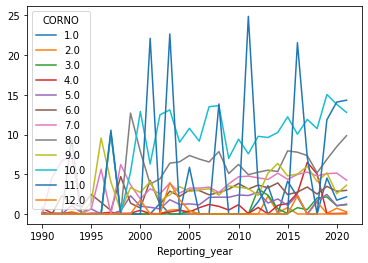

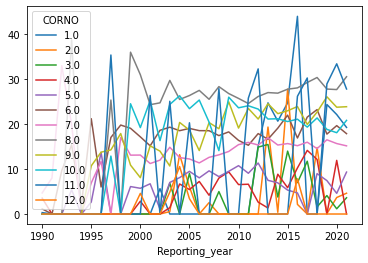

In [77]:

#road town by year

deaths_1990_road_cors = deaths_1990.groupby(['Reporting_year','CORNO'])['road_distance_miles'].mean().to_frame().reset_index()



deaths_1990_road_cors_piv =deaths_1990_road_cors.pivot(index='Reporting_year', columns='CORNO', values='road_distance_miles').fillna(0)

deaths_1990_road_cors_piv.plot(kind='line')


deaths_1990_road_cors = deaths_1990.groupby(['Reporting_year','CORNO'])['town_distance_miles'].mean().to_frame().reset_index()



deaths_1990_road_cors_piv =deaths_1990_road_cors.pivot(index='Reporting_year', columns='CORNO', values='town_distance_miles').fillna(0)

deaths_1990_road_cors_piv.plot(kind='line')


/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='Reporting_year'>

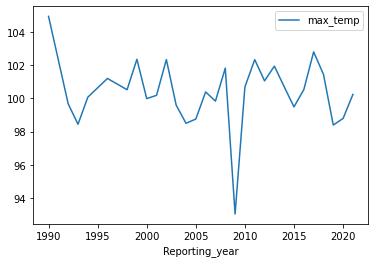

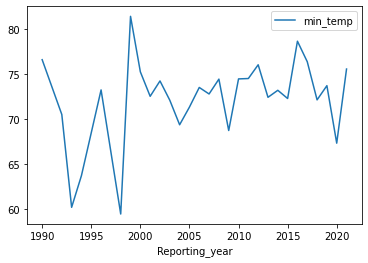

In [78]:
deaths_1990['max_temp'] = ((deaths_1990['max_temp'] * (9/5)) + 32)

deaths_1990['min_temp'] = ((deaths_1990['min_temp'] * (9/5)) + 32)



avg_high = deaths_1990[(deaths_1990['month']>=6)&(deaths_1990['month']<=6)].groupby('Reporting_year')['max_temp'].mean().to_frame().reset_index()
avg_high.plot(kind='line',x='Reporting_year')

avg_low = deaths_1990[(deaths_1990['month']>=6)&(deaths_1990['month']<=6)].groupby('Reporting_year')['min_temp'].mean().to_frame().reset_index()
avg_low.plot(kind='line',x='Reporting_year')


/Users/adevoid/opt/anaconda3/envs/pyqgis-dev/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='Reporting_year'>

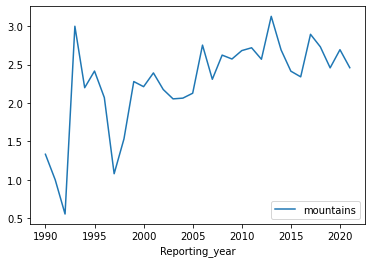

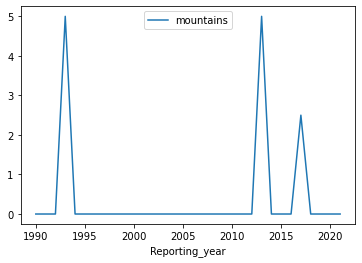

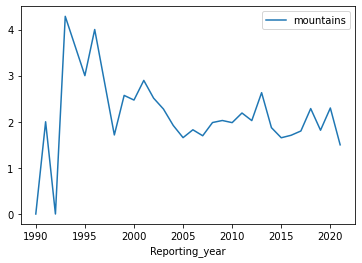

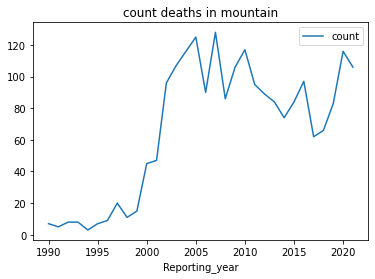

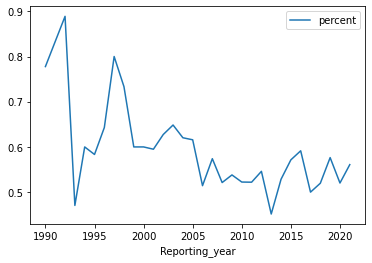

In [79]:




avg_mountain_year = deaths_1990.groupby('Reporting_year')['mountains'].mean().to_frame().reset_index()
avg_mountain_year.plot(kind='line',x='Reporting_year')

med_mountain_year = deaths_1990.groupby('Reporting_year')['mountains'].median().to_frame().reset_index()
med_mountain_year.plot(kind='line',x='Reporting_year')


deaths_1990_bab_mountain = deaths_1990[deaths_1990['CORNO']==7].groupby('Reporting_year')['mountains'].mean().to_frame().reset_index()
deaths_1990_bab_mountain.plot(kind='line',x='Reporting_year')



def funxx(x):
    if x['mountains'] == 0:
        return True
    else:
        return False
#     elif (x['mountains'] == 0)|(x['mountains'] == 1):
#         return False
    
    

deaths_1990['mountain_bool']= deaths_1990.apply(lambda x:funxx(x),axis=1)

count_mountain_year=deaths_1990.groupby('Reporting_year')['mountain_bool'].value_counts(dropna=False).to_frame()
count_mountain_year.columns = ['count'] 
count_mountain_year=count_mountain_year.reset_index()

count_mountain_year[count_mountain_year['mountain_bool']==True].plot(kind='line',x='Reporting_year',title="count deaths in mountain")


total_count_mountain_year= count_mountain_year.groupby('Reporting_year')['count'].sum().to_frame().reset_index()


count_mountain_year = count_mountain_year.merge(total_count_mountain_year,how='left',on='Reporting_year')


count_mountain_year['percent'] = count_mountain_year['count_x']/count_mountain_year['count_y']

count_mountain_year
count_mountain_year[count_mountain_year['mountain_bool']==True][['Reporting_year','percent']].plot(kind='line',x='Reporting_year')




In [80]:
print(2112+1660)
deaths_1990['mountain_bool'].value_counts(dropna=False)



3772


True     2112
False    1660
Name: mountain_bool, dtype: int64

<AxesSubplot:xlabel='Reporting_year'>

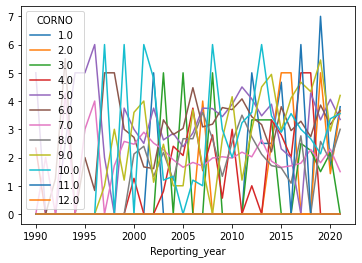

In [81]:








deaths_1990_mountain_cors = deaths_1990.groupby(['Reporting_year','CORNO'])['mountains'].mean().to_frame().reset_index()



deaths_1990_mountain_cors_piv =deaths_1990_mountain_cors.pivot(index='Reporting_year', columns='CORNO', values='mountains').fillna(0)

deaths_1990_mountain_cors_piv.plot(kind='line')

In [82]:
mm=deaths_1990['mountains'].value_counts(dropna=False).to_frame().reset_index()
print('')
# print((mm['mountains'][1]+mm['mountains'][2]+mm['mountains'][4]+mm['mountains'][5])/(mm['mountains'].sum()-131))
print('')
mm

index  mountains
0    0.0       2112
1    6.0       1093
2    5.0        509
3    4.0         46
4    7.0         12

In [83]:
print(deaths_1990['mountains'].mean())

deaths_1990[deaths_1990['CORNO']==7]['mountains'].mean()

2.4843584305408273


2.037830121341899

Reporting_year  border_distance_miles
0           1990.0              58.024882
1           1991.0              62.053790
2           1992.0              61.222290
3           1993.0              33.162743
4           1994.0              67.556087
5           1995.0              54.565063
6           1996.0              56.588254
7           1997.0              41.468455
8           1998.0              26.521379
9           1999.0              43.377945
10          2000.0              32.065003
11          2001.0              28.961746
12          2002.0              29.613084
13          2003.0              34.300478
14          2004.0              36.007369
15          2005.0              32.535686
16          2006.0              33.615328
17          2007.0              32.557054
18          2008.0              40.263371
19          2009.0              33.147754
20          2010.0              29.984067
21          2011.0              30.236379
22          2012.0              30.681709
23          2013.0              32.159569
24          2014.0              28.667584
25          2015.0              24.794709
26          2016.0              27.212216
27          2017.0              23.923332
28          2018.0              22.426297
29          2019.0              23.989695
30          2020.0              20.644544
31          2021.0              19.296538

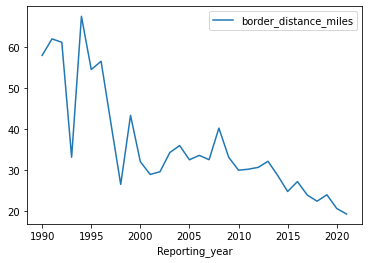

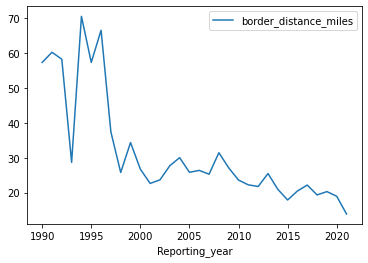

In [84]:
avg_border_year = deaths_1990.groupby(['Reporting_year'])['border_distance_miles'].mean().to_frame().reset_index()
avg_border_year.plot(kind='line',x='Reporting_year')

avg_border_year.to_csv('../migrant_deaths/data_for_each_death/data_for_curt/avg_distance_from_border_by_year.csv')

med_border_year = deaths_1990.groupby(['Reporting_year'])['border_distance_miles'].median().to_frame().reset_index()
med_border_year.plot(kind='line',x='Reporting_year')
avg_border_year

In [85]:




mean_datapoints=pd.read_csv('mean_death_datapoints.csv') 


mean_datapoints[mean_datapoints['CORNO'] == 7]


deaths_1990[deaths_1990['CORNO'] == 7]

Unnamed: 0 merge_id_x  coverage total  road_distance_miles      Date_x  \
4              4   00-00245               2             0.011787  2000-02-05   
5              5   00-00246               2             0.014584  2000-02-05   
6              6   00-00247               2             0.026114  2000-02-05   
7              7   00-00248               2             0.023316  2000-02-05   
8              8   00-00308               3             3.244729  2000-02-29   
11            11   00-00437               7             0.003288  2000-03-06   
16            16   00-00597               4             3.567150  2000-04-05   
27            27   00-00913               2             2.613700  2000-05-29   
28            28   00-00918               3             0.076549  2000-05-30   
33            33   00-00941               3             1.434840  2000-06-03   
34            34   00-00942               3             2.647421  2000-06-03   
36            36   00-00953               3             0.003059  2000-06-05   
38            38   00-00968               3             0.969857  2000-06-07   
49            49   00-01269               2             4.803894  2000-07-25   
53            53   00-01341               5             7.599090  2000-08-09   
62            62   00-01515               3             0.056843  2000-09-12   
64            64   00-01562               3             4.966140  2000-09-21   
74            74   01-00082               6             6.589637  2001-01-15   
77            77   01-00548               7             0.045788  2001-04-02   
81            81   01-00791               4             3.252849  2001-05-17   
83            83   01-00861               2             2.744915  2001-05-29   
84            84   01-00876               3             1.048879  2001-06-01   
87            87   01-00920               4            12.059888  2001-06-08   
89            89   01-00934               7             1.868803  2001-06-11   
91            91   01-00957               4             3.563569  2001-06-16   
92            92   01-00971               3             1.220434  2001-06-17   
94            94   01-00985               3             0.805125  2001-06-20   
95            95   01-00986               4             3.958742  2001-06-20   
96            96   01-00989               4             2.175543  2001-06-20   
97            97   01-00996               3             2.287507  2001-06-22   
99            99   01-01021               3             1.180465  2001-06-26   
109          109   01-01119               2             3.815483  2001-07-12   
111          111   01-01131               3             0.106672  2001-07-14   
112          112   01-01135               3             4.905621  2001-07-15   
114          114   01-01189               4             1.800952  2001-07-24   
116          116   01-01237               2             3.378916  2001-07-31   
117          117   01-01257               7             0.000814  2001-08-04   
118          118   01-01273               5             5.106930  2001-08-06   
120          120   01-01405               3             1.354764  2001-08-29   
121          121   01-01427               3             3.765551  2001-09-02   
122          122   01-01430               6             0.007387  2001-09-02   
124          124   01-01476               2             5.682156  2001-09-11   
126          126   01-01552               3             0.335155  2001-09-24   
130          130   01-01837               3             1.653114  2001-11-11   
131          131   01-01916               2             2.957390  2001-11-25   
135          135   01-01968               3            14.214074  2001-12-01   
154          154   02-00285               4             3.287283  2002-02-18   
157          157   02-00331               3             0.846189  2002-02-25   
158          158   02-00431               3             2.676183  2002-03-12   
160   

In [86]:
mean_datapoints

Unnamed: 0  Reporting_year  CORNO  mountains  coverage total  \
0             0          1990.0    1.0        NaN             NaN   
1             1          1990.0    2.0        NaN             NaN   
2             2          1990.0    3.0        NaN             NaN   
3             3          1990.0    4.0   2.333333        6.666667   
4             4          1990.0    5.0        NaN             NaN   
5             5          1990.0    6.0   0.000000        7.000000   
6             6          1990.0    7.0   0.000000        7.000000   
7             7          1990.0    8.0        NaN             NaN   
8             8          1990.0    9.0        NaN             NaN   
9             9          1990.0   10.0        NaN             NaN   
10           10          1990.0   11.0   0.000000        6.000000   
11           11          1990.0   12.0        NaN             NaN   
12           12          1991.0    1.0        NaN             NaN   
13           13          1991.0    2.0        NaN             NaN   
14           14          1991.0    3.0        NaN             NaN   
15           15          1991.0    4.0   0.000000        7.000000   
16           16          1991.0    5.0        NaN             NaN   
17           17          1991.0    6.0        NaN             NaN   
18           18          1991.0    7.0   2.000000        6.000000   
19           19          1991.0    8.0        NaN             NaN   
20           20          1991.0    9.0        NaN             NaN   
21           21          1991.0   10.0        NaN             NaN   
22           22          1991.0   11.0        NaN             NaN   
23           23          1991.0   12.0        NaN             NaN   
24           24          1992.0    1.0        NaN             NaN   
25           25          1992.0    2.0        NaN             NaN   
26           26          1992.0    3.0        NaN             NaN   
27           27          1992.0    4.0   0.000000        7.000000   
28           28          1992.0    5.0        NaN             NaN   
29           29          1992.0    6.0   1.250000        6.750000   
30           30          1992.0    7.0   0.000000        0.000000   
31           31          1992.0    8.0        NaN             NaN   
32           32          1992.0    9.0        NaN             NaN   
33           33          1992.0   10.0        NaN             NaN   
34           34          1992.0   11.0        NaN             NaN   
35           35          1992.0   12.0        NaN             NaN   
36           36          1993.0    1.0        NaN             NaN   
37           37          1993.0    2.0   0.000000        7.000000   
38           38          1993.0    3.0        NaN             NaN   
39           39          1993.0    4.0   0.000000        7.000000   
40           40          1993.0    5.0   2.500000        7.000000   
41           41          1993.0    6.0   5.500000        6.500000   
42           42          1993.0    7.0   4.285714        3.285714   
43           43          1993.0    8.0   0.000000        2.000000   
44           44          1993.0    9.0        NaN             NaN   
45           45          1993.0   10.0        NaN             NaN   
46           46          1993.0   11.0        NaN             NaN   
47           47          1993.0   12.0        NaN             NaN   
48           48          1994.0    1.0        NaN             NaN   
49           49          1994.0    2.0        NaN             NaN   
50           50          1994.0    3.0        NaN             NaN   
51           51          1994.0    4.0        NaN             NaN   
52           52          1994.0    5.0   5.000000        7.000000   
53           53          1994.0    6.0   0.000000        7.000000   
54           54          1994.0    7.0        NaN             NaN   
55           55          1994.0    8.0        NaN             NaN   
56           56          1994.0    9.0        NaN             NaN   
57 

Reporting_year    rvalue_1
0           1990.0  684.000000
1           1991.0  664.166667
2           1992.0  639.000000
3           1993.0  780.176471
4           1994.0  707.200000
5           1995.0  737.000000
6           1996.0  672.357143
7           1997.0  694.080000
8           1998.0  736.800000
9           1999.0  674.680000
10          2000.0  809.840000
11          2001.0  632.683544
12          2002.0  749.816993
13          2003.0  714.036364
14          2004.0  793.219251
15          2005.0  798.502463
16          2006.0  730.281407
17          2007.0  781.266094
18          2008.0  789.167665
19          2009.0  796.126263
20          2010.0  753.208889
21          2011.0  684.164021
22          2012.0  727.329268
23          2013.0  721.828125
24          2014.0  702.699301
25          2015.0  678.220000
26          2016.0  652.879518
27          2017.0  619.306452
28          2018.0  694.773438
29          2019.0  574.115385
30          2020.0  703.675105
31          2021.0  737.094118

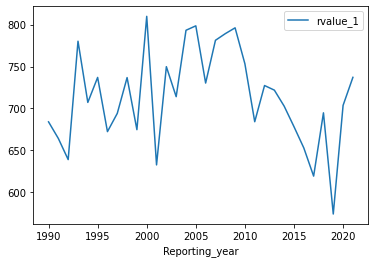

In [87]:
rug = gpd.read_file('../migrant_deaths/ruggedness/ruggedness_deaths_9_11_21.geojson')


rug['Reporting Date']= pd.to_datetime(rug['Reporting Date'])


rug['month']= pd.to_datetime(rug['Reporting Date']).dt.month
rug['Reporting_year']= pd.to_datetime(rug['Reporting Date']).dt.year





avg_rug_year = rug[rug['Reporting_year']>= 1990].groupby('Reporting_year')['rvalue_1'].mean().to_frame().reset_index()
avg_rug_year.plot(kind='line',x='Reporting_year')





avg_rug_year.to_csv('../migrant_deaths/data_for_each_death/data_for_curt/average_score_rugedness_index_by_year.csv')


# rug['rvalue_1'].value_counts(dropna=False).to_frame().reset_index().sort_values(by=['index'],ascending=False)
avg_rug_year




In [88]:


deaths_1990.groupby('Reporting_year').size().to_frame()







0
Reporting_year     
1990.0            9
1991.0            6
1992.0            9
1993.0           17
1994.0            5
1995.0           12
1996.0           14
1997.0           25
1998.0           15
1999.0           25
2000.0           75
2001.0           79
2002.0          153
2003.0          165
2004.0          187
2005.0          203
2006.0          175
2007.0          223
2008.0          165
2009.0          197
2010.0          224
2011.0          182
2012.0          163
2013.0          186
2014.0          140
2015.0          147
2016.0          164
2017.0          124
2018.0          127
2019.0          144
2020.0          223
2021.0          189